# Part 1. Studying the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

In [2]:
pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv('../data/hotel_bookings.csv')
raw_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

    We will consider booking without any adult irrelevant.

In [4]:
data = raw_data[raw_data['adults']>0]

## Cleaning

In [5]:
((data.isnull().sum()
 /len(raw_data)*100)
 .pipe(lambda s: s[s>=50])
)

company    93.995309
dtype: float64

In [6]:
# Drop 'company' as 94% of values are missing

cols_to_drop = [] # we will place all unnecessary features in this list
cols_to_drop.append('company')
data = data.drop(['company'], axis=1)

In [7]:
# columns which we likely need to drop
drop_candidates = []

In [8]:
data.isna().sum()[data.isna().sum()>0]

children        4
country       478
agent       16263
dtype: int64

In [9]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [10]:
data.dtypes.value_counts()

int64             16
object            11
float64            3
datetime64[ns]     1
Name: count, dtype: int64

In [11]:
object_cols = data.select_dtypes('object').columns
list(object_cols)

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [12]:
# checking correctness of values in categorical features

for col in object_cols:
    print('Feature {} contains values {}'.format(col, data[col].unique()))
    print()

Feature hotel contains values ['Resort Hotel' 'City Hotel']

Feature arrival_date_month contains values ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Feature meal contains values ['BB' 'FB' 'HB' 'SC' 'Undefined']

Feature country contains values ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' '

    Our data doesn`t contain any obvious dirtiness. We only have to deal with 3 features containing missing values. 

In [13]:
data['children'].value_counts()

children
0.0     110616
1.0       4857
2.0       3444
3.0         65
10.0         1
Name: count, dtype: int64

In [14]:
data['children'].fillna(0, inplace=True)

In [15]:
data['country'].value_counts() 

country
PRT    48440
GBR    12105
FRA    10376
ESP     8546
DEU     7271
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

    Random impute - we will fill missing values with randomly sampled values of feature.

In [16]:
sample = data['country'].dropna().sample(data['country'].isna().sum())
sample

23237    PRT
65827    PRT
49106    PRT
76446    PRT
53019    PRT
        ... 
16349    PRT
42043    ESP
52428    PRT
90926    DEU
88453    PRT
Name: country, Length: 478, dtype: object

In [17]:
sample.index = data[data['country'].isna()].index

In [18]:
data.loc[data['country'].isna(), 'country'] = sample

In [19]:
# automating
def RandomImpute(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isna()].index
    df.loc[df[feature].isna(), feature] = random_sample

In [20]:
data['agent'].value_counts()

agent
9.0      31743
240.0    13922
1.0       7187
14.0      3617
7.0       3528
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [21]:
RandomImpute(data, 'agent')

In [22]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

    Now we have a clean dataset.

## Data Analysis (EDA)

In [23]:
# setting runtime configurtion
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

### Top countries where the guests come from

In [24]:
data_canceled0 = data.query("is_canceled==0")

In [25]:
country_data = (data_canceled0
 .groupby(['hotel', 'country']).size()
 .reset_index()
 .rename(columns={0:'no_guests'})
)

In [26]:
country_data

hotel country  no_guests
0      City Hotel     ABW          2
1      City Hotel     AGO        140
2      City Hotel     AIA          1
3      City Hotel     ALB          8
4      City Hotel     ARE          5
..            ...     ...        ...
263  Resort Hotel     VEN          2
264  Resort Hotel     VNM          2
265  Resort Hotel     ZAF         13
266  Resort Hotel     ZMB          1
267  Resort Hotel     ZWE          2

[268 rows x 3 columns]

In [27]:
def top_n_items(sub_df, n, sort_col):
    return sub_df.nlargest(n, sort_col)

In [28]:
country_data = country_data.groupby('hotel').apply(top_n_items, n=10, sort_col='no_guests')

In [29]:
country_data = country_data.reset_index(level=0, drop=True)

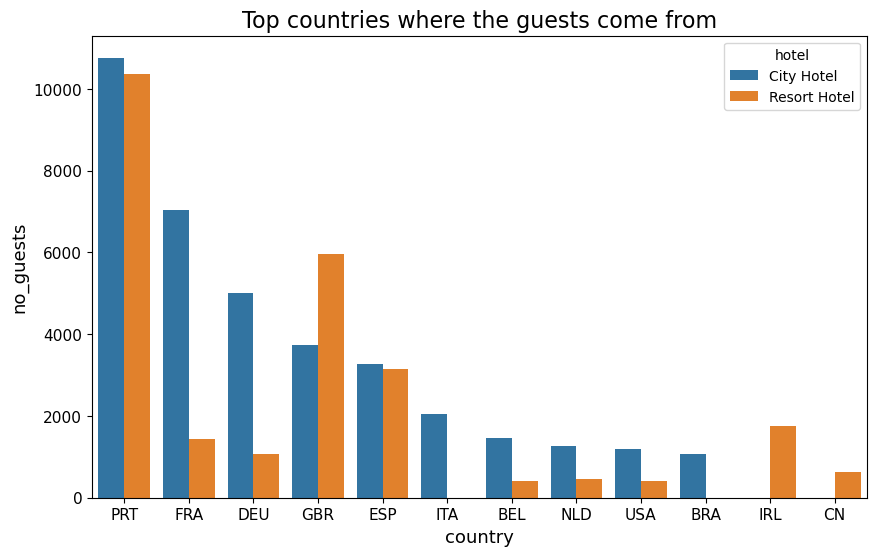

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(data = country_data, x = 'country', y = 'no_guests', hue='hotel')
plt.title('Top countries where the guests come from')
plt.show()

    Portugal is the leader in the number of visitors which come from there for both hotels. In case of City hotel the second and third places belong to France and Germany respectively. For Resort hotel these are Great Britain and Spain.

### Do guests come with children/babies?

In [31]:
children = data_canceled0[['children', 'babies', 'hotel']]

In [32]:
children['with_children'] = (children['children']>0)|(children['babies']>0)

In [33]:
children['with_children'] = children['with_children'].map({False:'no', True:'yes'})

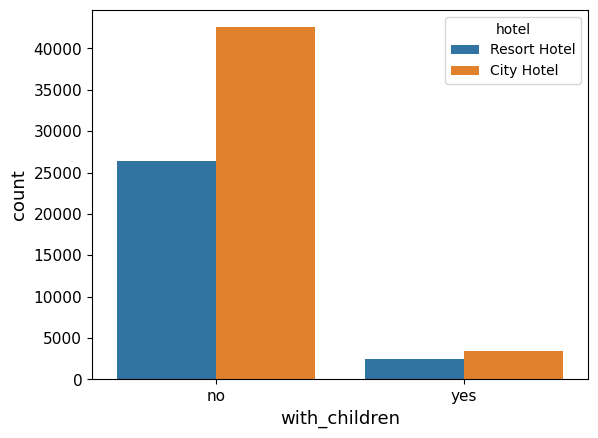

In [34]:
sns.countplot(data = children, x = 'with_children', hue='hotel')
plt.show()

    Clearly, the majority of guests come to both hotels without children.

### How much do guests pay for a room per night?

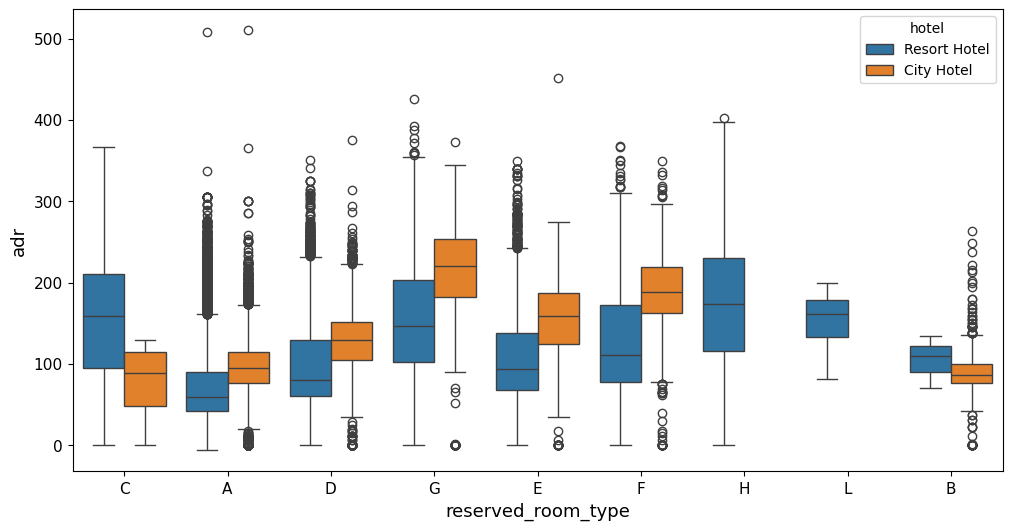

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data_canceled0, x = 'reserved_room_type', y = 'adr', hue = 'hotel')
plt.show()

    The distributions of prices for different room types are very variable. Still, one can conclude that in the City hotel rooms of type G are usually more expensive compared to other types. It is clear, that there are no rooms of type H and L in the City hotel. Rooms A are usually the cheapest in the Resort hotel and are among the cheapest in the City hotel.

### Bookings made for weekdays weekends or both?

In [36]:
data_canceled0.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    9.0   
1                  C                4   No Deposit  240.0   
2                  C                0   No Deposit    9.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [37]:
def stays_func(row):
    
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if (row[feature1] > 0)&(row[feature2] == 0):
        return 'just_weekend'
    if (row[feature1] == 0)&(row[feature2] > 0):
        return 'just_week'
    if (row[feature1] > 0)&(row[feature2] > 0):
        return 'both_weekend_and_week'
    else:
        return 'undefined'

In [38]:
data_canceled0['stays'] = data_canceled0.apply(stays_func,axis=1)

In [39]:
resort_data = data_canceled0.query("hotel=='Resort Hotel'")
city_data = data_canceled0.query("hotel=='City Hotel'")

In [40]:
resort_data.groupby(['arrival_date_month', 'stays']).size().unstack()

stays               both_weekend_and_week  just_week  just_weekend  undefined
arrival_date_month                                                           
April                                1495        898           137         20
August                               2309        744           170         34
December                              808       1007           147         52
February                             1002       1089           197         20
January                               649        990           196         31
July                                 2188        777           132         40
June                                 1337        592            82         26
March                                1162       1227           154         28
May                                  1450        826           221         38
November                              855        959           129         32
October                              1405        899           229         42
September                            1457        554            83          8

In [41]:
# let us sort the obtained dataframe by month

import sort_dataframeby_monthorweek as sd

In [42]:
grouped_resort = resort_data.groupby(['arrival_date_month', 'stays']).size().unstack().reset_index()

In [43]:
grouped_resort = sd.Sort_Dataframeby_Month(grouped_resort,'arrival_date_month')

In [44]:
grouped_resort = grouped_resort.set_index('arrival_date_month')

In [45]:
grouped_resort

both_weekend_and_week  just_week  just_weekend  undefined
arrival_date_month                                                           
January                               649        990           196         31
February                             1002       1089           197         20
March                                1162       1227           154         28
April                                1495        898           137         20
May                                  1450        826           221         38
June                                 1337        592            82         26
July                                 2188        777           132         40
August                               2309        744           170         34
September                            1457        554            83          8
October                              1405        899           229         42
November                              855        959           129         32
December                              808       1007           147         52

In [46]:
# the same procedure for City Hotel
grouped_city = city_data.groupby(['arrival_date_month', 'stays']).size().unstack().reset_index()
grouped_city = sd.Sort_Dataframeby_Month(grouped_city,'arrival_date_month')
grouped_city = grouped_city.set_index('arrival_date_month')

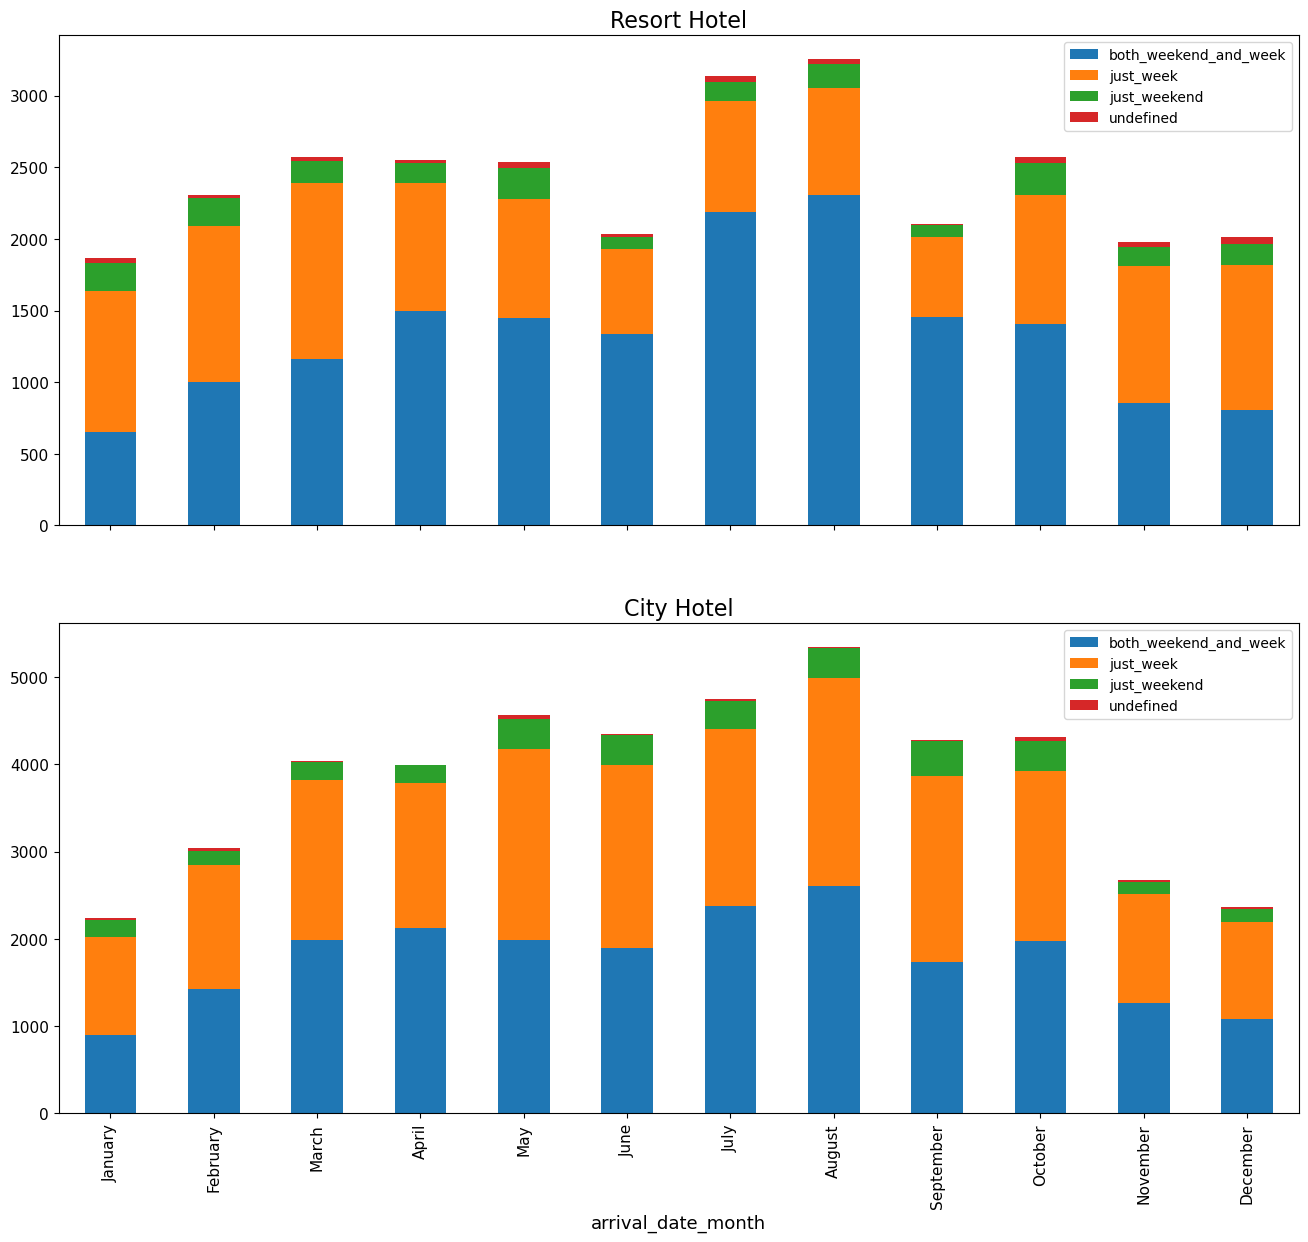

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,14), sharex = True)
grouped_resort.plot(kind='bar', stacked=True, ax=ax1)
grouped_city.plot(kind='bar', stacked=True, ax=ax2)
ax1.set_title('Resort Hotel')
ax2.set_title('City Hotel')
plt.show()

    Visitors of both hotels much less likely stay only during the weekend. Comparing graphs, it seems that blue color dominates in case of the Resort hotel. Blue corresponds to the longer stays (during both week and weekend). It is likely to be due to the Resort hotel's specialization, which is hinted at by the name itself. This also justifies why July and August are clearly the busiest months for the Resort hotel. From above graphs we can also capture, that overall number of guests in the City hotel is comparably higher in every month.

### Which are the most busy months?

In [48]:
data_canceled0.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    9.0   
1                  C                4   No Deposit  240.0   
2                  C                0   No Deposit    9.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

       stays  
0  undefined  
1  undefined  
2  just_week  
3  just_week  
4  just_week

In [49]:
month_resort = resort_data['arrival_date_month'].value_counts().reset_index()
month_resort.columns = ['month', 'no_bookings_resort']
month_city = city_data['arrival_date_month'].value_counts().reset_index()
month_city.columns = ['month', 'no_bookings_city']

In [50]:
month_data = month_resort.merge(month_city, on = 'month')
month_data = sd.Sort_Dataframeby_Month(month_data, 'month')

In [51]:
month_data

month  no_bookings_resort  no_bookings_city
0     January                1866              2235
1    February                2308              3039
2       March                2571              4043
3       April                2550              3997
4         May                2535              4560
5        June                2037              4349
6        July                3137              4747
7      August                3257              5346
8   September                2102              4279
9     October                2575              4312
10   November                1975              2675
11   December                2014              2363

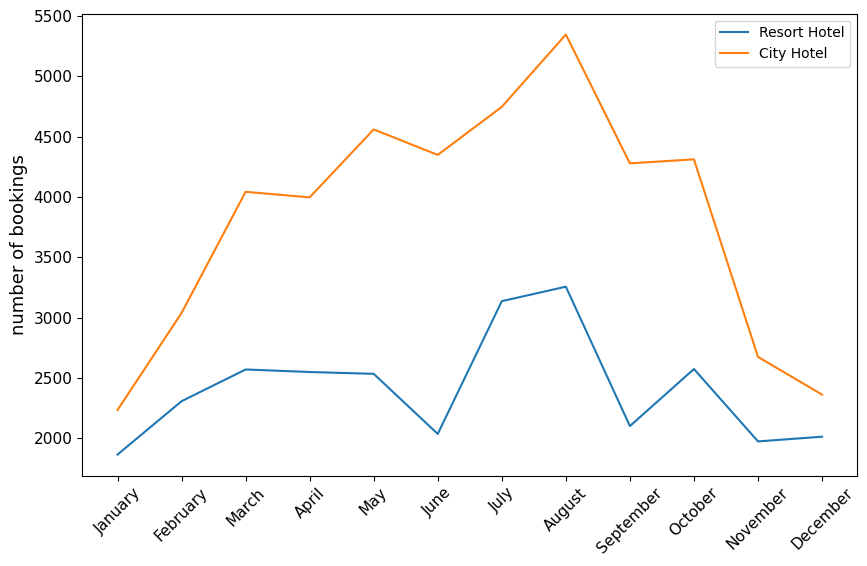

In [52]:
plt.figure(figsize=(10,6))
plt.plot(month_data['month'], month_data['no_bookings_resort'], label='Resort Hotel')
plt.plot(month_data['month'], month_data['no_bookings_city'], label='City Hotel')
plt.ylabel('number of bookings')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

    The dynamics for both hotels is simple - generally the winter period is quieter and summer time is the busiest. However, unlike City hotel, the rise and descent of activity for the Resort hotel is not so smooth with abrupt drops in June and September. 

### Which month has highest adr?

In [53]:
data_canceled0_sorted = sd.Sort_Dataframeby_Month(data_canceled0, 'arrival_date_month')

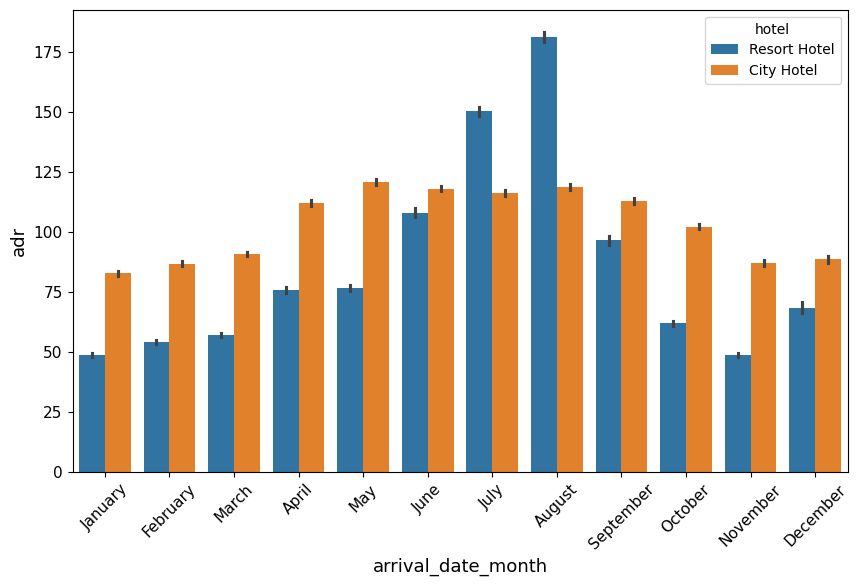

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data = data_canceled0_sorted, x = 'arrival_date_month', y = 'adr', hue = 'hotel')
plt.xticks(rotation=45)
plt.show()

    We have already found out that the busiest period for both hotels is summer. Increase of demand leads to raise of the prices. It is especially noticable for the Resort hotel, for which seasonality plays crucial role due to its specialization. The prices in the City hotel change not as severely, although similar pattern is observed for it too. 

## Feature Engineering

In [55]:
data.dtypes.value_counts()

int64             16
object            11
float64            3
datetime64[ns]     1
Name: count, dtype: int64

In [56]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    9.0   
1                  C                4   No Deposit  240.0   
2                  C                0   No Deposit    9.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [57]:
# create lists for new features and for features which were used to form the new features
added_cols = []
forming_cols = []

In [58]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

added_cols.append('total_nights')
forming_cols.append('stays_in_weekend_nights')
drop_candidates.append('stays_in_weekend_nights')
forming_cols.append('stays_in_week_nights')
drop_candidates.append('stays_in_week_nights')

In [59]:
def stays_func(row):
    
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if (row[feature1] > 0)&(row[feature2] == 0):
        return 'just_weekend'
    if (row[feature1] == 0)&(row[feature2] > 0):
        return 'just_week'
    if (row[feature1] > 0)&(row[feature2] > 0):
        return 'both_weekend_and_week'
    else:
        return 'undefined'

In [60]:
data['stays_format'] = data.apply(stays_func, axis=1)

added_cols.append('stays_format')

In [61]:
data['total_guests'] = data['adults']+data['children']+data['babies']

added_cols.append('total_guests')
forming_cols.append('adults')
forming_cols.append('children')
forming_cols.append('babies')
drop_candidates.append('adults')
drop_candidates.append('children')
drop_candidates.append('babies')

In [62]:
def children_func(row):
    if (row['children'] == 0)&(row['babies'] == 0):
        return 0
    else:
        return 1

In [63]:
data['children_binary'] = data.apply(children_func, axis = 1)

added_cols.append('children_binary')

In [64]:
def room_type(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return 1
    else:
        return 0

In [65]:
data['room_assigned_equal_reserved'] = data.apply(room_type, axis = 1)

added_cols.append('room_assigned_equal_reserved')
forming_cols.append('assigned_room_type')
forming_cols.append('reserved_room_type')
drop_candidates.append('assigned_room_type')
drop_candidates.append('reserved_room_type')

In [66]:
def deposit_type(row):
    if row['deposit_type'] == 'Non Refund':
        return 1
    else:
        return 0

In [67]:
data['deposit_type'] = data.apply(deposit_type, axis=1)

added_cols.append('deposit_type')
forming_cols.append('deposit_type')

In [68]:
# represents the same info as feature is_canceled

data.drop(['reservation_status'], axis=1, inplace=True)
cols_to_drop.append('reservation_status')

In [69]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes  deposit_type  agent  \
0                  C                3             0    9.0   
1                  C                4             0  240.0   
2                  C                0             0    9.0   
3                  A                0             0  304.0   
4                  A                0             0  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status_date  total_nights  \
0                          0              2015-07-01             0   
1                          0              2015-07-01             0   
2                          0              2015-07-02             1   
3                          0              2015-07-02             1   
4                          1              2015-07-03             2   

  stays_format  total_guests  children_binary  room_assigned_equal_reserved  
0    undefined           2.0                0                             1  
1    undefined           2.0                0                             1  
2    just_week           1.0                0                             0  
3    just_week           1.0                0                             1  
4    just_week           2.0                0                             1

### adr seasonal decomposition

    It is logical to assume that average daily rate would probably have seasonal pattern. The information we extract from this feature could be of an importance further. 

#### Encoding arrival_date_month

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
import sort_dataframeby_monthorweek as sd

In [72]:
months = sd.Sort_Dataframeby_Month(data,'arrival_date_month')['arrival_date_month'].unique()

In [73]:
month_encoding = np.arange(1,13)

In [74]:
enc_dict = {}
for obj in zip(months, month_encoding):
    enc_dict[obj[0]] = obj[1]

In [75]:
data['arrival_date_month'] = data['arrival_date_month'].map(enc_dict)

    Let us make seasonal decomposition in detail for the part of dataset which represents Resort Hotel only.

In [76]:
resort_data = data.query("hotel == 'Resort Hotel'").reset_index()
resort_data.head()

index         hotel  is_canceled  lead_time  arrival_date_year  \
0      0  Resort Hotel            0        342               2015   
1      1  Resort Hotel            0        737               2015   
2      2  Resort Hotel            0          7               2015   
3      3  Resort Hotel            0         13               2015   
4      4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes  deposit_type  agent  \
0                  C                3             0    9.0   
1                  C                4             0  240.0   
2                  C                0             0    9.0   
3                  A                0             0  304.0   
4                  A                0             0  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status_date  total_nights  \
0                          0              2015-07-01             0   
1                          0              2015-07-01             0   
2                          0              2015-07-02             1   
3                          0              2015-07-02             1   
4                          1              2015-07-03             2   

  stays_format  total_guests  children_binary  room_assigned_equal_reserved  
0    undefined           2.0                0                             1  
1    undefined           2.0                0                             1  
2    just_week           1.0                0                             0  
3    just_week           1.0                0                             1  
4    just_week           2.0                0                             1

In [77]:
grouped_resort = resort_data.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].median()
grouped_resort

arrival_date_year  arrival_date_month
2015               7                     123.00
                   8                     154.00
                   9                      79.50
                   10                     51.00
                   11                     41.44
                   12                     55.00
2016               1                      44.80
                   2                      53.00
                   3                      53.57
                   4                      68.00
                   5                      68.00
                   6                      94.37
                   7                     159.00
                   8                     197.10
                   9                      92.00
                   10                     61.00
                   11                     47.00
                   12                     60.60
2017               1                      48.00
                   2                      49.00
  

In [78]:
# as we obtained monthly data 
decomposition_resort = seasonal_decompose(grouped_resort, model='additive', period=12, extrapolate_trend='freq')

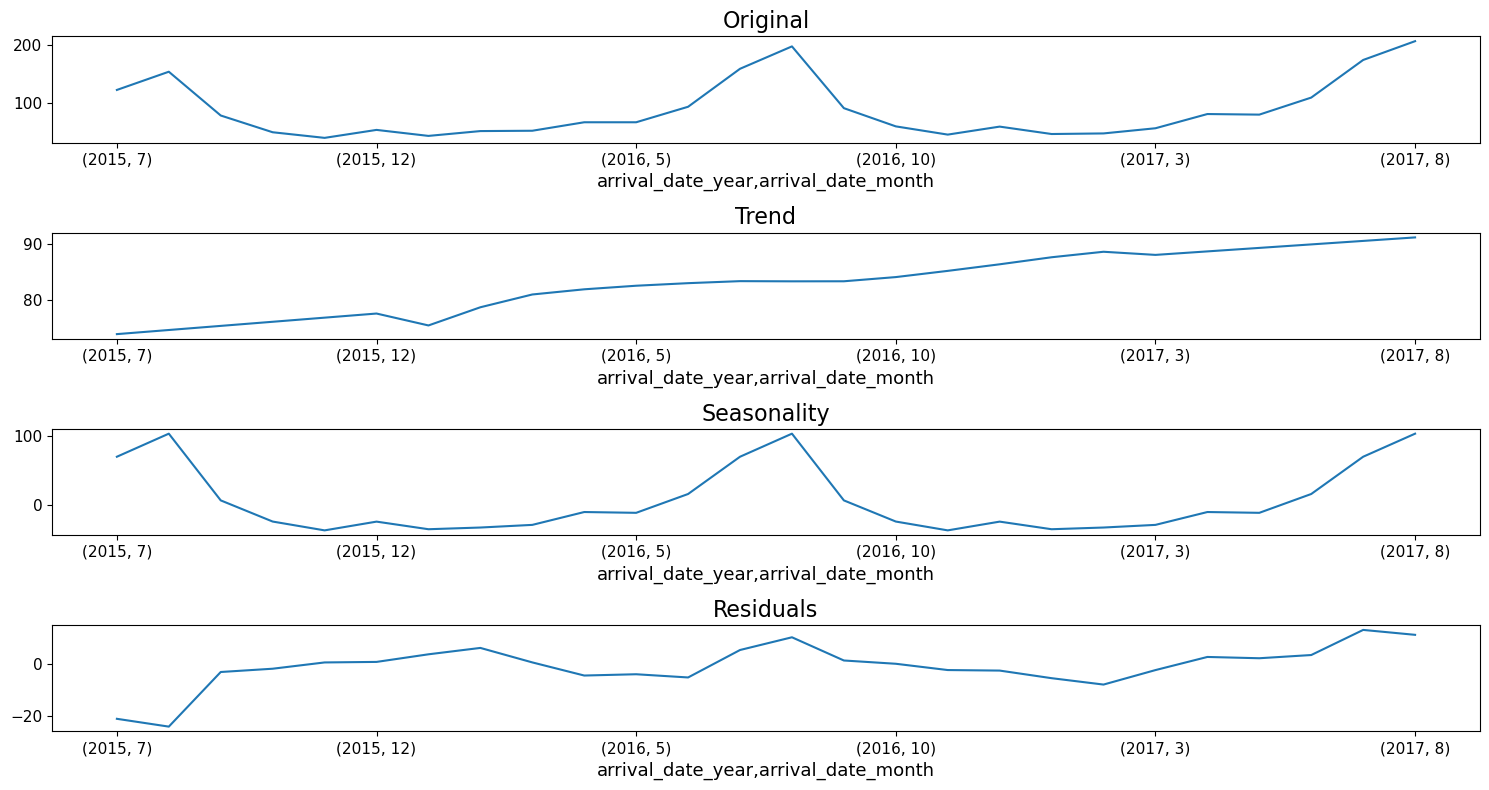

In [79]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
grouped_resort.plot(ax=ax1, title='Original')
decomposition_resort.trend.plot(ax=ax2, title='Trend')
decomposition_resort.seasonal.plot(ax=ax3, title='Seasonality')
decomposition_resort.resid.plot(ax=ax4, title='Residuals')
fig.tight_layout()

In [80]:
seasonal_resort = (pd.DataFrame(grouped_resort).assign(trend = decomposition_resort.trend.values,
                                    seasonality = decomposition_resort.seasonal.values,
                                    resid = decomposition_resort.resid.values)
                 .drop(['adr'], axis=1).reset_index())

In [81]:
(pd.merge(resort_data, seasonal_resort, on=['arrival_date_year', 'arrival_date_month'])
 .set_index('index')
)

hotel  is_canceled  lead_time  arrival_date_year  \
index                                                            
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
40055  Resort Hotel            0        212               2017   
40056  Resort Hotel            0        169               2017   
40057  Resort Hotel            0        204               2017   
40058  Resort Hotel            0        211               2017   
40059  Resort Hotel            0        161               2017   

       arrival_date_month  arrival_date_week_number  \
index                                                 
0                       7                        27   
1                       7                        27   
2                       7                        27   
3                       7                        27   
4                       7                        27   
...                   ...                       ...   
40055                   8                        35   
40056                   8                        35   
40057                   8                        35   
40058                   8                        35   
40059                   8                        35   

       arrival_date_day_of_month  stays_in_weekend_nights  \
index                                                       
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              1                        0   
...                          ...                      ...   
40055                         31                        2   
40056                         30                        2   
40057                         29                        4   
40058                         31                        4   
40059                         31                        4   

       stays_in_week_nights  adults  children  babies meal country  \
index                                                                
0                         0       2       0.0       0   BB     PRT   
1                         0       2       0.0       0   BB     PRT   
2                         1       1       0.0       0   BB     GBR   
3                         1       1       0.0       0   BB     GBR   
4                         2       2       0.0       0   BB     GBR   
...                     ...     ...       ...     ...  ...     ...   
40055                     8       2       1.0       0   BB     GBR   
40056                     9       2       0.0       0   BB     IRL   
40057                    10       2       0.0       0   BB     IRL   
40058                    10       2       0.0       0   HB     GBR   
40059                    10       2       0.0       0   HB     DEU   

      market_segment distribution_channel  is_repeated_guest  \
index                                                          
0             Direct               Direct                  0   
1             Direct               Direct                  0   
2             Direct               Direct                  0   
3          Corporate            Corporate                  0   
4          Online TA                TA/TO                  0   
...              ...                  ...                ...   
40055  Offline TA/TO                TA/TO                  0   
40056         Direct               Direct                  0   
40057         Direct               Direct                  0   
40058  Offline TA/TO          

    We have added information about trend, seasonality and residuals at the end of the dataset.

In [82]:
# automating
def get_seasonal(group, time_col, agg_col, period):
    
    # Grouping by time_col and using median as aggregation function
    group = group.reset_index()
    ts = group.groupby(time_col)[agg_col].median()

    # Handling groups with insufficient data
    if len(ts) < period+1:
        return group.assign(seasonal=0, trend=0, resid=0).set_index('index')

    # Performing decomposition of the time series
    res = seasonal_decompose(ts, model='additive', period=period, extrapolate_trend='freq')
    
    # Attaching decomposed components to the ts
    components = (pd.DataFrame(ts).assign(trend = res.trend.values,
                                    seasonal = res.seasonal.values,
                                    resid = res.resid.values)
                                  .drop([agg_col], axis=1).reset_index())
    
    # Merging group and components on time_col
    return pd.merge(group, components, on=time_col).set_index('index')

def add_seasonal(df, time_col, group_cols, agg_col):
    return (df
            .groupby(group_cols)
            .apply(get_seasonal, time_col=time_col, agg_col=agg_col, period=12)
            .drop(columns=group_cols)
            .reset_index(drop=False)
            .set_index('index')
            .loc[df.index]
    )

In [83]:
data = add_seasonal(data, ['arrival_date_year', 'arrival_date_month'], 'hotel', agg_col='adr')
data.head()

hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342               2015   
1  Resort Hotel            0        737               2015   
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes  deposit_type  agent  \
0                  C                3             0    9.0   
1                  C                4             0  240.0   
2                  C                0             0    9.0   
3                  A                0             0  304.0   
4                  A                0             0  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status_date  total_nights  \
0                          0              2015-07-01             0   
1                          0              2015-07-01             0   
2                          0              2015-07-02             1   
3                          0              2015-07-02             1   
4                          1              2015-07-03             2   

  stays_format  total_guests  children_binary  room_assigned_equal_reserved  \
0    undefined           2.0                0                             1   
1    undefined           2.0                0                             1   
2    just_week           1.0                0                             0   
3    just_week           1.0                0                             1   
4    just_week           2.0                0                             1   

       trend   seasonal      resid  
0  73.733977  70

In [84]:
added_cols.append('trend')
added_cols.append('seasonal')
added_cols.append('resid')

In [85]:
forming_cols.append('hotel')
forming_cols.append('adr')
forming_cols.append('arrival_date_year')
forming_cols.append('arrival_date_month')

### Feature Encoding

In [86]:
cat_cols = data.select_dtypes('object').columns
num_cols = data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

In [87]:
data[cat_cols].nunique()

hotel                     2
meal                      5
country                 177
market_segment            8
distribution_channel      5
reserved_room_type        9
assigned_room_type       11
customer_type             4
stays_format              4
dtype: int64

In [88]:
high_cardinality_feats = data[cat_cols].nunique().pipe(lambda s: s[s>=5]).index
low_cardinality_feats = cat_cols.difference(high_cardinality_feats)

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn import set_config

In [90]:
set_config(transform_output='pandas')

In [91]:
l_enc = LabelEncoder()

In [92]:
for col in low_cardinality_feats:
    data[col] = l_enc.fit_transform(data[col])

In [93]:
t_enc = TargetEncoder(target_type='binary', random_state=123)

In [94]:
data[high_cardinality_feats] = t_enc.fit_transform(data[high_cardinality_feats], data['is_canceled'])

In [95]:
data[cat_cols].head()

hotel      meal   country  market_segment  distribution_channel  \
0      1  0.374473  0.564882        0.151095              0.173178   
1      1  0.373804  0.567116        0.155790              0.176098   
2      1  0.373798  0.200981        0.153950              0.175122   
3      1  0.374473  0.201330        0.188650              0.223141   
4      1  0.374151  0.201416        0.368152              0.410818   

   reserved_room_type  assigned_room_type  customer_type  stays_format  
0            0.326231            0.184386              2             3  
1            0.328803            0.187333              2             3  
2            0.391693            0.192612              2             1  
3            0.391085            0.444683              2             1  
4            0.391783            0.445669              2             1

## Handling outliers

In [96]:
len(num_cols)

28

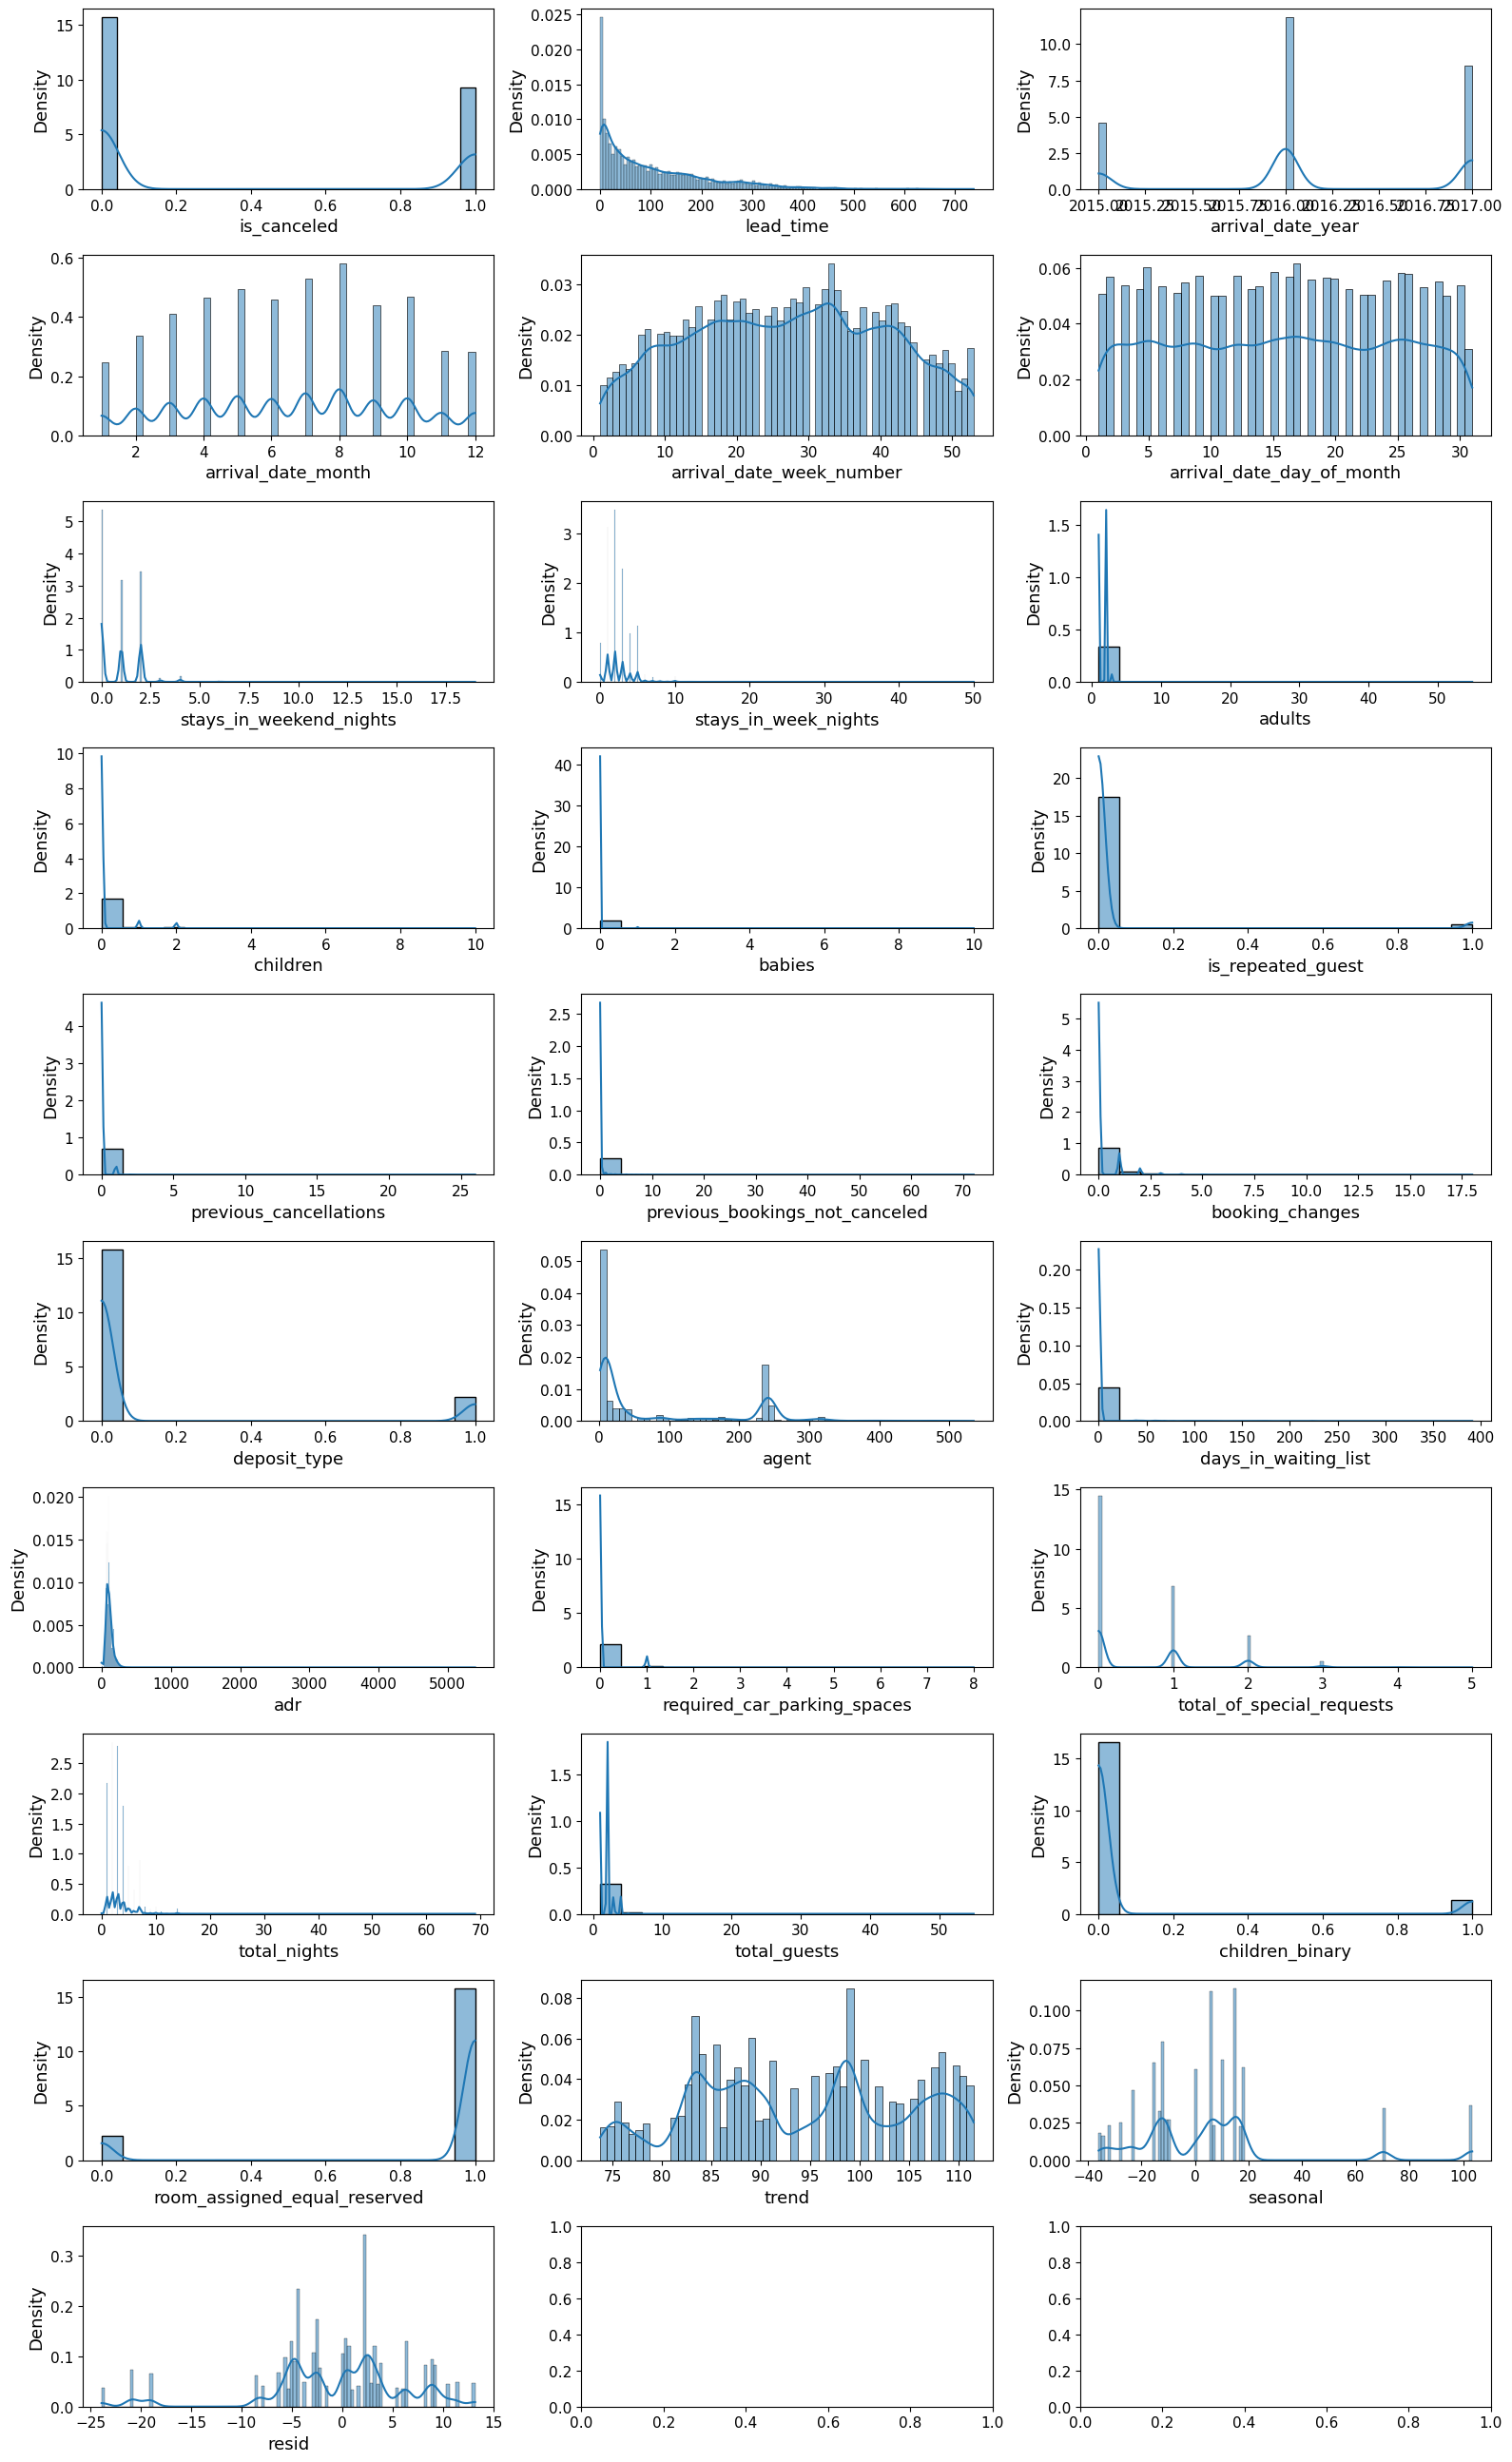

In [97]:
fig, ax = plt.subplots(10,3, figsize = (16,26))

for i, col in enumerate(num_cols):
    sns.histplot(data = data, x = col, ax = ax[i//3, i%3], stat='density', kde=True)

fig.tight_layout()

In [98]:
drop_candidates.extend(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
                        'arrival_date_day_of_month', 'reservation_status_date'])

#### Continious features

In [99]:
def hist_and_box(col):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,6))
    sns.boxplot(data[col], ax = ax1, orient = 'h')
    sns.histplot(data[col], stat='density', kde = True, ax = ax2)
    ax1.set_xticks([])
    ax1.set_yticks([])
    fig.tight_layout()
    plt.show()

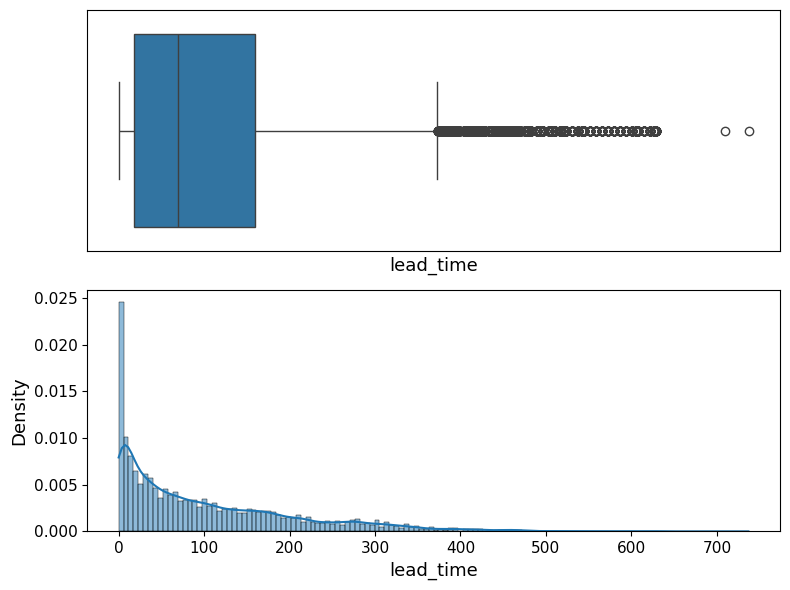

In [100]:
hist_and_box('lead_time')

In [101]:
def log_transform(col):
    data[col] = np.log1p(data[col])

In [102]:
log_transform('lead_time')

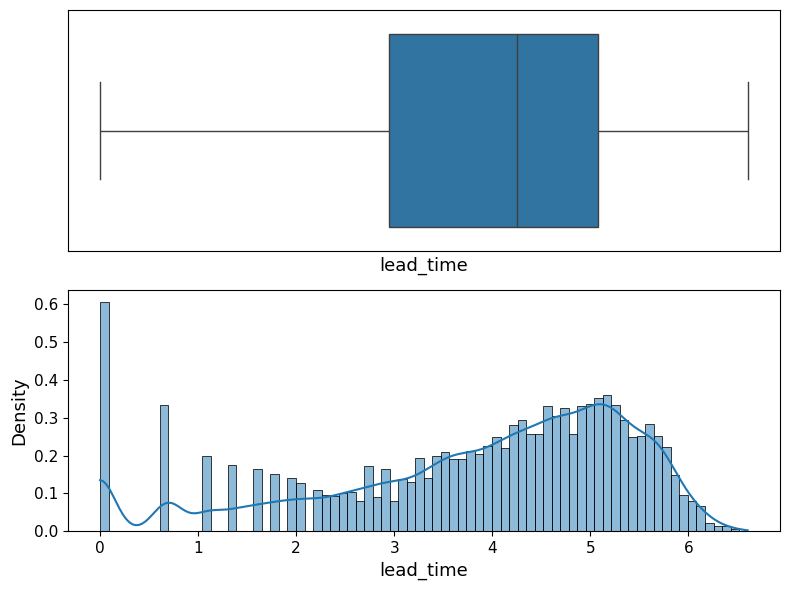

In [103]:
hist_and_box('lead_time')

#### adr

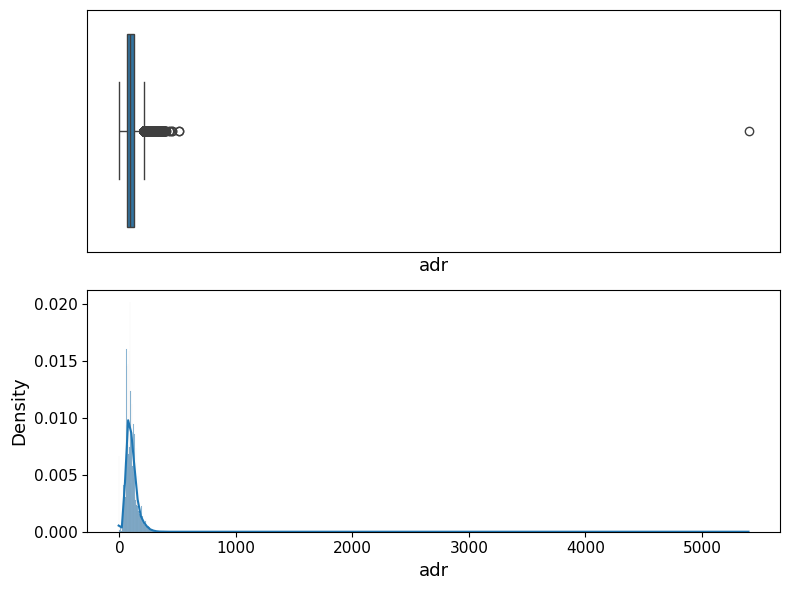

In [104]:
hist_and_box('adr')

In [105]:
(data['adr'] < 0).sum()

1

    One of instances has negative adr.

In [106]:
log_transform('adr')

In [107]:
data.adr.isna().sum()

1

In [108]:
data['adr'] = data['adr'].fillna(0)

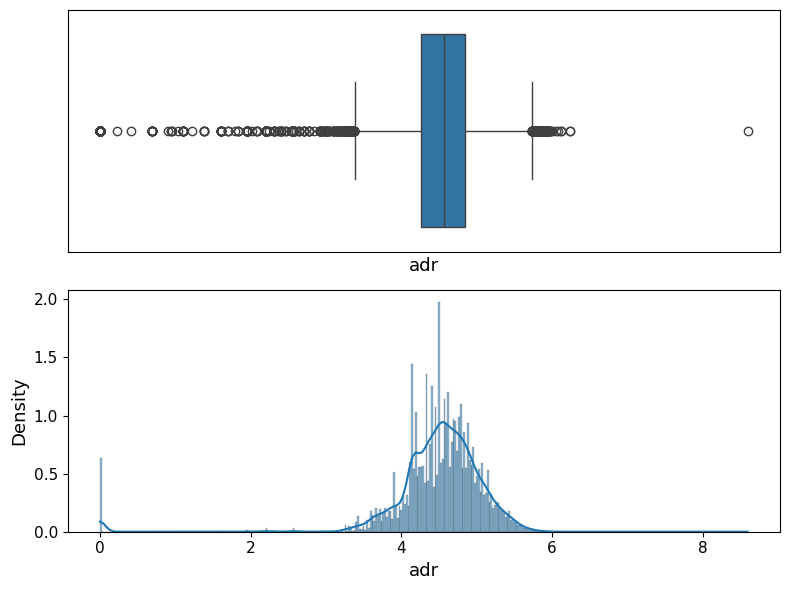

In [109]:
hist_and_box('adr')

#### Discrete features

In [110]:
drop_candidates

['stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'assigned_room_type',
 'reserved_room_type',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'reservation_status_date']

In [111]:
data['total_guests'].value_counts().sort_index()

total_guests
1.0     22577
2.0     81846
3.0     10481
4.0      3929
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: count, dtype: int64

In [112]:
data['total_guests'] = np.where(data['total_guests']>=4, 4, data['total_guests'])

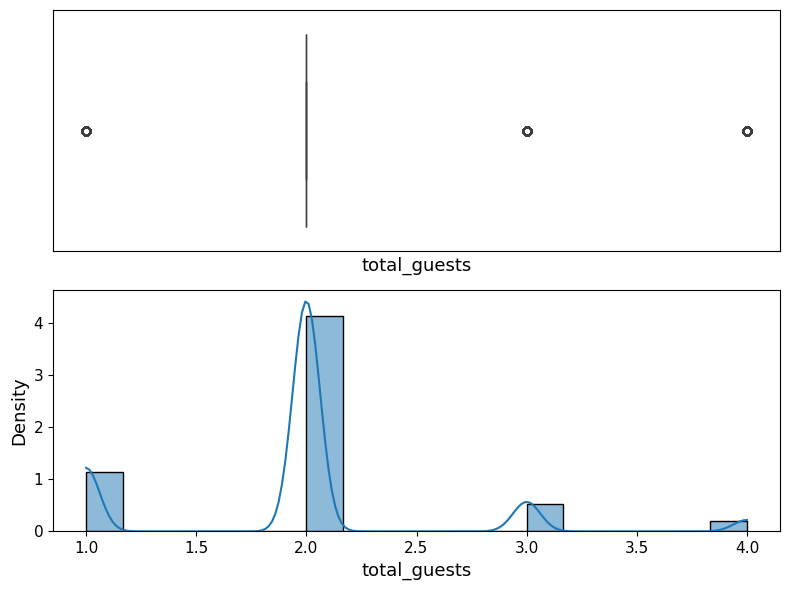

In [113]:
hist_and_box('total_guests')

    Now value 4 in the column total_guests represents all instances for which number of total guest is equal to 4 or bigger than 4. We will apply the same procedure to other discrete features.

In [114]:
def outlier_func(col, val):
    data[col] = np.where(data[col]>=val, val, data[col])

In [115]:
outlier_func('previous_cancellations', 1)

In [116]:
outlier_func('previous_bookings_not_canceled', 1)

In [117]:
outlier_func('booking_changes', 1)

In [118]:
outlier_func('days_in_waiting_list', 1)

In [119]:
outlier_func('required_car_parking_spaces', 1)

In [120]:
outlier_func('total_of_special_requests', 2)

In [121]:
outlier_func('total_nights', 8)

## Filtering Features

In [122]:
final_data = data.drop(drop_candidates, axis=1)
len(final_data.columns)

26

#### In which columns does a single value predominate?

In [123]:
value_list = []
perc_list = []
for col in final_data.columns:
    counts = final_data[col].value_counts()/len(final_data)*100
    value_list.append(counts.index[0])
    perc_list.append(counts.max())

share_df = (pd.DataFrame({'value': value_list, 'percentage': perc_list}, index=final_data.columns)
           .sort_values(by='percentage', ascending=False))

cols_with_single = share_df[share_df['percentage']>=90].index

In [124]:
share_df.loc[cols_with_single,:]

value  percentage
previous_bookings_not_canceled    0.0   96.964374
days_in_waiting_list              0.0   96.896300
is_repeated_guest                 0.0   96.845033
previous_cancellations            0.0   94.556548
required_car_parking_spaces       0.0   93.774950
children_binary                   0.0   92.344542

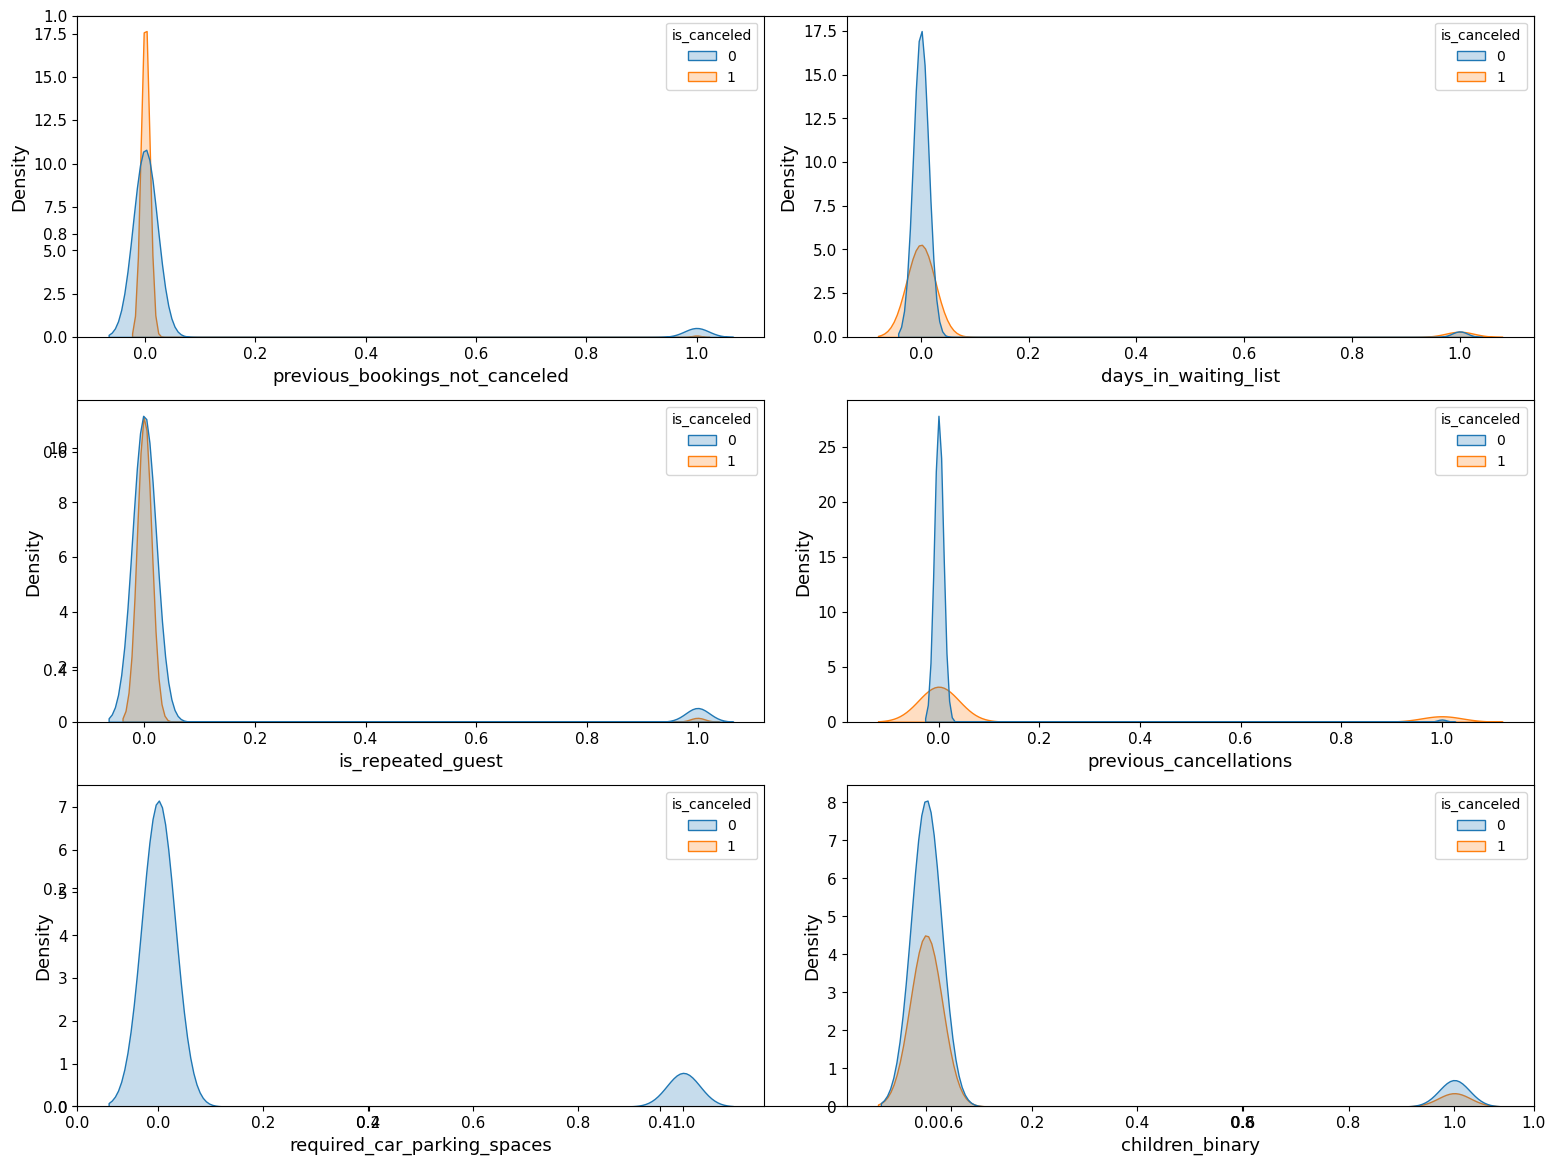

In [125]:
fig, ax = plt.subplots(figsize=(16,12))
for i, col in enumerate(cols_with_single):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data = final_data, x = col, hue = 'is_canceled', fill = True)
fig.tight_layout()

    Let us have a look at kdeplot for previous_bookings_not_canceled column above. It takes only two values, 0 and 1, what is true for all depicted columns. The bell above the value 1 is almost totally blue with a little share of orange color near the bottom. It means that, if the feature takes value 1 for some instance, this instance most likely takes value 0 in the target feature is_canceled. Thus, thanks to the feature previous_bookings_not_canceled, we are able to roughly separate certain amount of instances with is_canceled==0 by one criterion. If we consider the feature children_binary, it is clear there is no way to separate any group of instances with its' help. is_canceled takes 0 with approximately same probability independent from value which children_binary takes. 

    Based on such reasoning we add 3 columns to the drop_candidates list.

In [126]:
drop_candidates.extend(['children_binary', 'is_repeated_guest', 'days_in_waiting_list'])

In [127]:
final_data = data.drop(drop_candidates, axis=1)
len(final_data.columns)

23

In [128]:
# required_car_parking_spaces
final_data[final_data['required_car_parking_spaces'] == 1]['is_canceled'].value_counts()

is_canceled
0    7407
Name: count, dtype: int64

#### Correlation matrix

In [129]:
corr_m = np.absolute(final_data.corr())

In [130]:
upper_triangle = corr_m.where(np.triu(np.ones(corr_m.shape)).astype(bool))

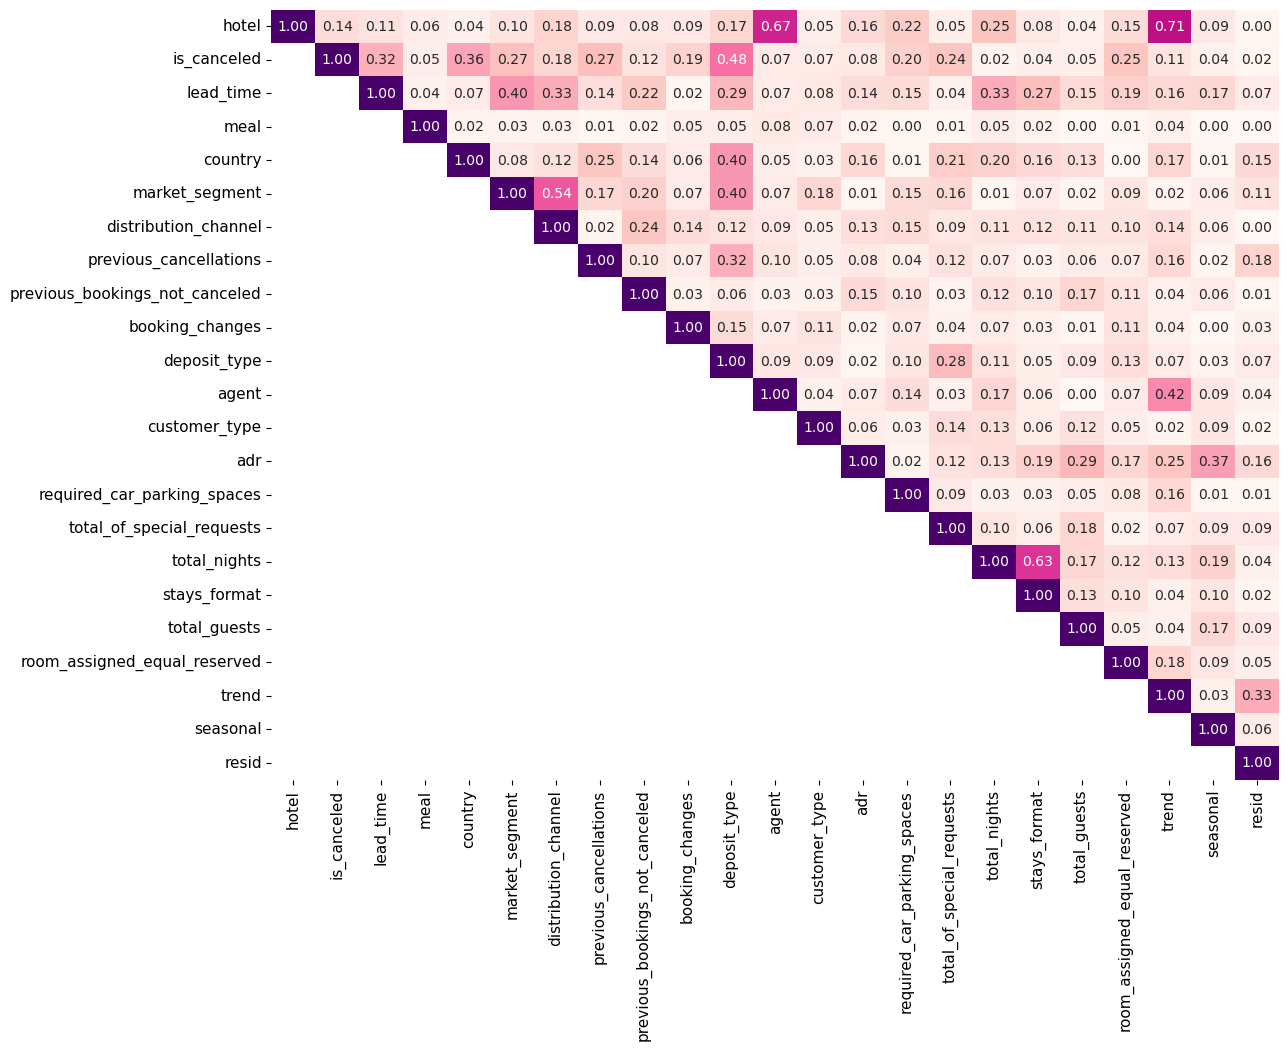

In [131]:
plt.figure(figsize = (13,10))
sns.heatmap(upper_triangle, cbar=False, cmap = 'RdPu', annot=True, fmt='.2f')
plt.show()

    No highly correlated features detected.

In [132]:
# preparing dropping lists
cols_to_drop_later = []
for col in drop_candidates:
    if col in added_cols and col not in forming_cols:
        added_cols.remove(col)
        continue
    if col not in forming_cols:
        cols_to_drop.append(col)
    else:
        cols_to_drop_later.append(col)

In [133]:
print(added_cols)

['total_nights', 'stays_format', 'total_guests', 'room_assigned_equal_reserved', 'deposit_type', 'trend', 'seasonal', 'resid']


In [134]:
print(cols_to_drop)

['company', 'reservation_status', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status_date', 'is_repeated_guest', 'days_in_waiting_list']


In [135]:
print(cols_to_drop_later)

['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'assigned_room_type', 'reserved_room_type', 'arrival_date_year', 'arrival_date_month']


<a id='etl_pipe'></a>

## Performing ETL-Pipeline

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

In [2]:
added_cols = ['total_nights', 'stays_format', 'total_guests', 'room_assigned_equal_reserved', 'deposit_type', 
              'trend', 'seasonal', 'resid']

In [3]:
cols_to_drop = ['company', 'reservation_status', 'arrival_date_week_number', 
                'arrival_date_day_of_month', 'reservation_status_date', 'is_repeated_guest', 
                'days_in_waiting_list', 'is_canceled']

In [4]:
cols_to_drop_later = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
                      'assigned_room_type', 'reserved_room_type', 'arrival_date_year', 'arrival_date_month']

In [5]:
# Extracting data
raw_data = pd.read_csv('../data/hotel_bookings.csv').query("adults>0")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config

In [7]:
set_config(transform_output='pandas')

In [8]:
X = raw_data.drop(cols_to_drop, axis = 1)
y = raw_data['is_canceled']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [10]:
len(X_train)

83290

In [11]:
len(X_train.columns)

24

### Transforming data

In [12]:
children_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [13]:
def RandomImpute(df):
    for feature in df:
        random_sample = df[feature].dropna().sample(df[feature].isna().sum())
        random_sample.index = df[df[feature].isna()].index
        df.loc[df[feature].isna(), feature] = random_sample
    return df

In [14]:
imputer = ColumnTransformer(
    transformers=[
        ('children_imputer', children_imputer, ['children']),
        ('rand_imputer', FunctionTransformer(RandomImpute), ['country', 'agent'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [15]:
pipe = Pipeline(
    steps=[
        ('imputer', imputer)
    ])

In [16]:
tmp_X = pipe.fit_transform(X_train)

In [17]:
tmp_X.dtypes.value_counts()

int64      11
object     10
float64     3
Name: count, dtype: int64

In [18]:
tmp_X.isna().sum().sum()

0

    So far we realized cleaning of dataset through our pipeline.

#### Adding features

In [19]:
added_cols

['total_nights',
 'stays_format',
 'total_guests',
 'room_assigned_equal_reserved',
 'deposit_type',
 'trend',
 'seasonal',
 'resid']

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
# inheritence from these two classes (common convention)

In [21]:
class Create_Stays_Features(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature1 = 'stays_in_weekend_nights'
        self.feature2 = 'stays_in_week_nights'
        
    def stays_func(self, row):
        if (row[self.feature1] > 0)&(row[self.feature2] == 0):
            return 'just_weekend'
        if (row[self.feature1] == 0)&(row[self.feature2] > 0):
            return 'just_week'
        if (row[self.feature1] > 0)&(row[self.feature2] > 0):
            return 'both_weekend_and_week'
        else:
            return 'undefined'
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['total_nights'] = X[self.feature1] + X[self.feature2]
        X['stays_format'] = X.apply(self.stays_func, axis=1)
        return X

In [22]:
def create_guests_feat(df):
    df['total_guests'] = df['adults'] + df['children'] + df['babies']
    return df

In [23]:
class Create_Room_Feature(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature1 = 'assigned_room_type'
        self.feature2 = 'reserved_room_type'
        
    def room_type(self, row):
        if row[self.feature1] == row[self.feature2]:
            return 1
        else:
            return 0
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['room_assigned_equal_reserved'] = X.apply(self.room_type, axis = 1)
        return X

In [24]:
class Transform_Deposit_Feature(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feat = 'deposit_type'
        
    def change_type(self, row):
        if row[self.feat] == 'Non Refund':
            return 1
        else:
            return 0
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X[self.feat] = X.apply(self.change_type, axis=1)
        return X

In [25]:
class Add_Seasonal_components(BaseEstimator, TransformerMixin):
    def __init__(self, time_cols, group_cols, agg_col):
        self.time_cols = time_cols
        self.group_cols = group_cols
        self.agg_col = agg_col
        
    def get_seasonal(self, group, time_cols, agg_col, period):
        from statsmodels.tsa.seasonal import seasonal_decompose
        group = group.reset_index()
        ts = group.groupby(time_cols)[agg_col].median()

        # Handling groups with insufficient data
        if len(ts) < period+1:
            return group.assign(seasonal=0, trend=0, resid=0).set_index('index')

        # Performing decomposition of the time series
        res = seasonal_decompose(ts, model='additive', period=period, extrapolate_trend='freq')
    
        # Attaching decomposed components to the ts
        components = (pd.DataFrame(ts).assign(trend = res.trend.values,
                                        seasonal = res.seasonal.values,
                                        resid = res.resid.values)
                                        .drop([agg_col], axis=1).reset_index())
    
        # Merging group and components on time_col
        return pd.merge(group, components, on=time_cols).set_index('index')
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X.groupby(self.group_cols)
                .apply(self.get_seasonal, time_cols=self.time_cols, agg_col=self.agg_col, period=12)
                .drop(columns=self.group_cols)
                .reset_index(drop=False)
                .set_index('index')
                .loc[X.index]
               )

In [26]:
def drop_last_cols(df):
    cols_to_drop_later = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
                      'assigned_roqom_type', 'reserved_room_type', 'arrival_date_year', 'arrival_date_month']
    return df.drop(cols_to_drop_later, axis=1)

In [27]:
feat_generator = ColumnTransformer(
    transformers=[
        ('stays_feats', Create_Stays_Features(), ['stays_in_weekend_nights', 'stays_in_week_nights']),
        ('guests_feat', FunctionTransformer(create_guests_feat), ['adults', 'children', 'babies']),
        ('room_feat', Create_Room_Feature(), ['assigned_room_type', 'reserved_room_type']),
        ('deposit_feat', Transform_Deposit_Feature(), ['deposit_type'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [30]:
Transform_Pipeline = Pipeline(
    steps=[
        ('imputer', imputer),
        ('feat_generator', feat_generator),
        ('add_seasonal_components', Add_Seasonal_components(
            time_cols=['arrival_date_year', 'arrival_date_month'], group_cols='hotel', agg_col='adr')),
        ('drop_feats', FunctionTransformer(drop_last_cols))
    ])

    In spite of the model type we are going to implement further we will be loading data which is obtained as a result of above tranformations:

In [29]:
Transform_Pipeline.fit_transform(X_train, y_train)

hotel  total_nights           stays_format  total_guests  \
101347    City Hotel             1              just_week           2.0   
16480   Resort Hotel             4              just_week           2.0   
16203   Resort Hotel            14  both_weekend_and_week           2.0   
118135    City Hotel             3  both_weekend_and_week           2.0   
113037    City Hotel             2              just_week           1.0   
...              ...           ...                    ...           ...   
87946     City Hotel             4  both_weekend_and_week           2.0   
73268     City Hotel             7  both_weekend_and_week           3.0   
37567   Resort Hotel             4  both_weekend_and_week           2.0   
41091     City Hotel             2              just_week           2.0   
75729     City Hotel             4  both_weekend_and_week           2.0   

        room_assigned_equal_reserved  deposit_type country  agent  lead_time  \
101347                             1             0     ITA    9.0        119   
16480                              1             0     ESP  240.0         37   
16203                              1             0     IRL   95.0        127   
118135                             0             0     IRL    9.0         23   
113037                             1             0     BEL    9.0          6   
...                              ...           ...     ...    ...        ...   
87946                              1             0     DEU    9.0         81   
73268                              1             0     ROU    9.0        177   
37567                              1             0     ESP  240.0        131   
41091                              1             0     PRT    1.0         41   
75729                              1             0     PRT    1.0        302   

       meal market_segment distribution_channel  previous_cancellations  \
101347   SC      Online TA                TA/TO                       0   
16480    BB      Online TA                TA/TO                       0   
16203    BB  Offline TA/TO                TA/TO                       0   
118135   BB      Online TA                TA/TO                       0   
113037   BB       Aviation            Corporate                       0   
...     ...            ...                  ...                     ...   
87946    BB      Online TA                TA/TO                       0   
73268    BB      Online TA                TA/TO                       0   
37567    BB      Online TA                TA/TO                       0   
41091    BB         Groups                TA/TO                       0   
75729    BB         Groups                TA/TO                       1   

        previous_bookings_not_canceled  booking_changes    customer_type  \
101347                               0                0        Transient   
16480                                0                0        Transient   
16203                                0                0        Transient   
118135                               0                0        Transient   
113037                               0                0        Transient   
...                                ...              ...              ...   
87946                                0                0        Transient   
73268                                0                0        Transient   
37567                                0                0        Transient   
41091                                0                0  Transient-Party   
75729                                0                0  Transient-Party   

           adr  required_car_parking_spaces  total_of_special_requests  \
101347  161.10                            0                          1   
16480   153.00                            0                          2   
16203   119.25                            0                          0   
118135  190.00                            0

#### Saving transform pipeline

In [31]:
import dill as pickle
with open('Transform_pipe.pkl', 'wb') as file:
    pickle.dump(Transform_Pipeline, file)

<a id='model_building'><a/>

# Part 2. Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
set_config(transform_output='pandas')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression

In [3]:
# setting runtime configurtion
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

In [4]:
raw_data = pd.read_csv('../data/hotel_bookings.csv').query("adults>0")

In [5]:
cols_to_drop = ['company', 'reservation_status', 'arrival_date_week_number', 
                'arrival_date_day_of_month', 'reservation_status_date', 'is_repeated_guest', 
                'days_in_waiting_list', 'is_canceled']

In [6]:
X = raw_data.drop(cols_to_drop, axis = 1)
y = raw_data['is_canceled']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [8]:
import dill as pickle
with open('Transform_pipe.pkl', 'rb') as file:
    Transform_Pipe = pickle.load(file)

In [9]:
def debug_transformer(X, name):
    globals()[name] = X
    return X

#### [RandomForest](#rf)

### LogisticRegression

    A linear model known for its' interpretability and computational effiiciency. A very good choice if a dataset has features which are somewhat linearly separable. 

#### Encoding

In [10]:
X_train_transformed = Transform_Pipe.fit_transform(X_train, y_train)

In [11]:
X_train_transformed.dtypes.value_counts()

int64      9
object     7
float64    6
Name: count, dtype: int64

In [12]:
cat_feats_df = X_train_transformed.select_dtypes('object')

In [13]:
cat_feats_df.nunique()

hotel                     2
stays_format              4
country                 168
meal                      5
market_segment            8
distribution_channel      5
customer_type             4
dtype: int64

In [14]:
high_cardinality_feats = ['country']
low_cardinality_feats = cat_feats_df.columns.difference(high_cardinality_feats)

In [15]:
X_train_transformed[low_cardinality_feats].head()

customer_type distribution_channel         hotel market_segment meal  \
67035        Transient                TA/TO    City Hotel  Offline TA/TO   BB   
4160         Transient                TA/TO  Resort Hotel      Online TA   BB   
93116        Transient                TA/TO    City Hotel      Online TA   SC   
34164  Transient-Party                TA/TO  Resort Hotel         Groups   BB   
93018        Transient                TA/TO    City Hotel      Online TA   BB   

                stays_format  
67035  both_weekend_and_week  
4160   both_weekend_and_week  
93116              just_week  
34164  both_weekend_and_week  
93018              just_week

    As we observe low cardinality features are nominal with no sign of ordinality in them. We will apply one-hot encoding to exclude any dependency among categories in such features. We will apply target encoding to the rest to avoid curse of dimensionality.

In [16]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
target_encoder = TargetEncoder(target_type='binary', random_state=142)

In [17]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', one_hot_encoder, low_cardinality_feats),
        ('target_encoder', target_encoder, high_cardinality_feats)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [18]:
log_reg1 = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor1),
        # in this step we can obtain the result of transform by ETL_pipeline and preprocessor 
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression())
    ])

In [19]:
log_reg1.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [20]:
tmp_X

customer_type_Group  customer_type_Transient  \
67035                  0.0                      1.0   
4160                   0.0                      1.0   
93116                  0.0                      1.0   
34164                  0.0                      0.0   
93018                  0.0                      1.0   
...                    ...                      ...   
87946                  0.0                      1.0   
61163                  0.0                      1.0   
37567                  0.0                      1.0   
41091                  0.0                      0.0   
57679                  0.0                      1.0   

       customer_type_Transient-Party  distribution_channel_Direct  \
67035                            0.0                          0.0   
4160                             0.0                          0.0   
93116                            0.0                          0.0   
34164                            1.0                          0.0   
93018                            0.0                          0.0   
...                              ...                          ...   
87946                            0.0                          0.0   
61163                            0.0                          0.0   
37567                            0.0                          0.0   
41091                            1.0                          0.0   
57679                            0.0                          0.0   

       distribution_channel_GDS  distribution_channel_TA/TO  \
67035                       0.0                         1.0   
4160                        0.0                         1.0   
93116                       0.0                         1.0   
34164                       0.0                         1.0   
93018                       0.0                         1.0   
...                         ...                         ...   
87946                       0.0                         1.0   
61163                       1.0                         0.0   
37567                       0.0                         1.0   
41091                       0.0                         1.0   
57679                       0.0                         1.0   

       distribution_channel_Undefined  hotel_Resort Hotel  \
67035                             0.0                 0.0   
4160                              0.0                 1.0   
93116                             0.0                 0.0   
34164                             0.0                 1.0   
93018                             0.0                 0.0   
...                               ...                 ...   
87946                             0.0                 0.0   
61163                             0.0                 0.0   
37567                             0.0                 1.0   
41091                             0.0                 0.0   
57679                             0.0                 0.0   

       market_segment_Complementary  market_segment_Corporate  \
67035                           0.0                       0.0   
4160                            0.0                       0.0   
93116                           0.0                       0.0   
34164                           0.0                       0.0   
93018                           0.0                       0.0   
...                             ...                       ...   
87946                           0.0                       0.0   
61163                           0.0                       0.0   
37567                           0.0                       0.0   
41091                           0.0                       0.0   
57679                           0.0                       0.0   

       market_segment_Direct  market_segment_Groups  \
67035                    0.0                    0.0   
4160                     0.0                    0.0   
93116                    0.0                    0.0   
34164                    0

In [21]:
test_score = log_reg1.score(X_test, y_test)

In [22]:
print(f"We created our first model with the accuracy score {test_score:.4f} on the test set")

We created our first model with the accuracy score 0.8033 on the test set


In [23]:
y_train.value_counts()/len(y_train)

is_canceled
0    0.629247
1    0.370753
Name: count, dtype: float64

    As our classes are not ideally balanced, such metrics as precision, recall and balanced_accuracy would be more insightful to use.

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

    In order for LogisticRegression to perform well, its' assumptions should be taken into consideration. More specifically, we have to deal with outliers in data, as they may affect our model's perfomance.

In [25]:
num_cols = X_train_transformed.select_dtypes(exclude='object').columns
len(num_cols)

15

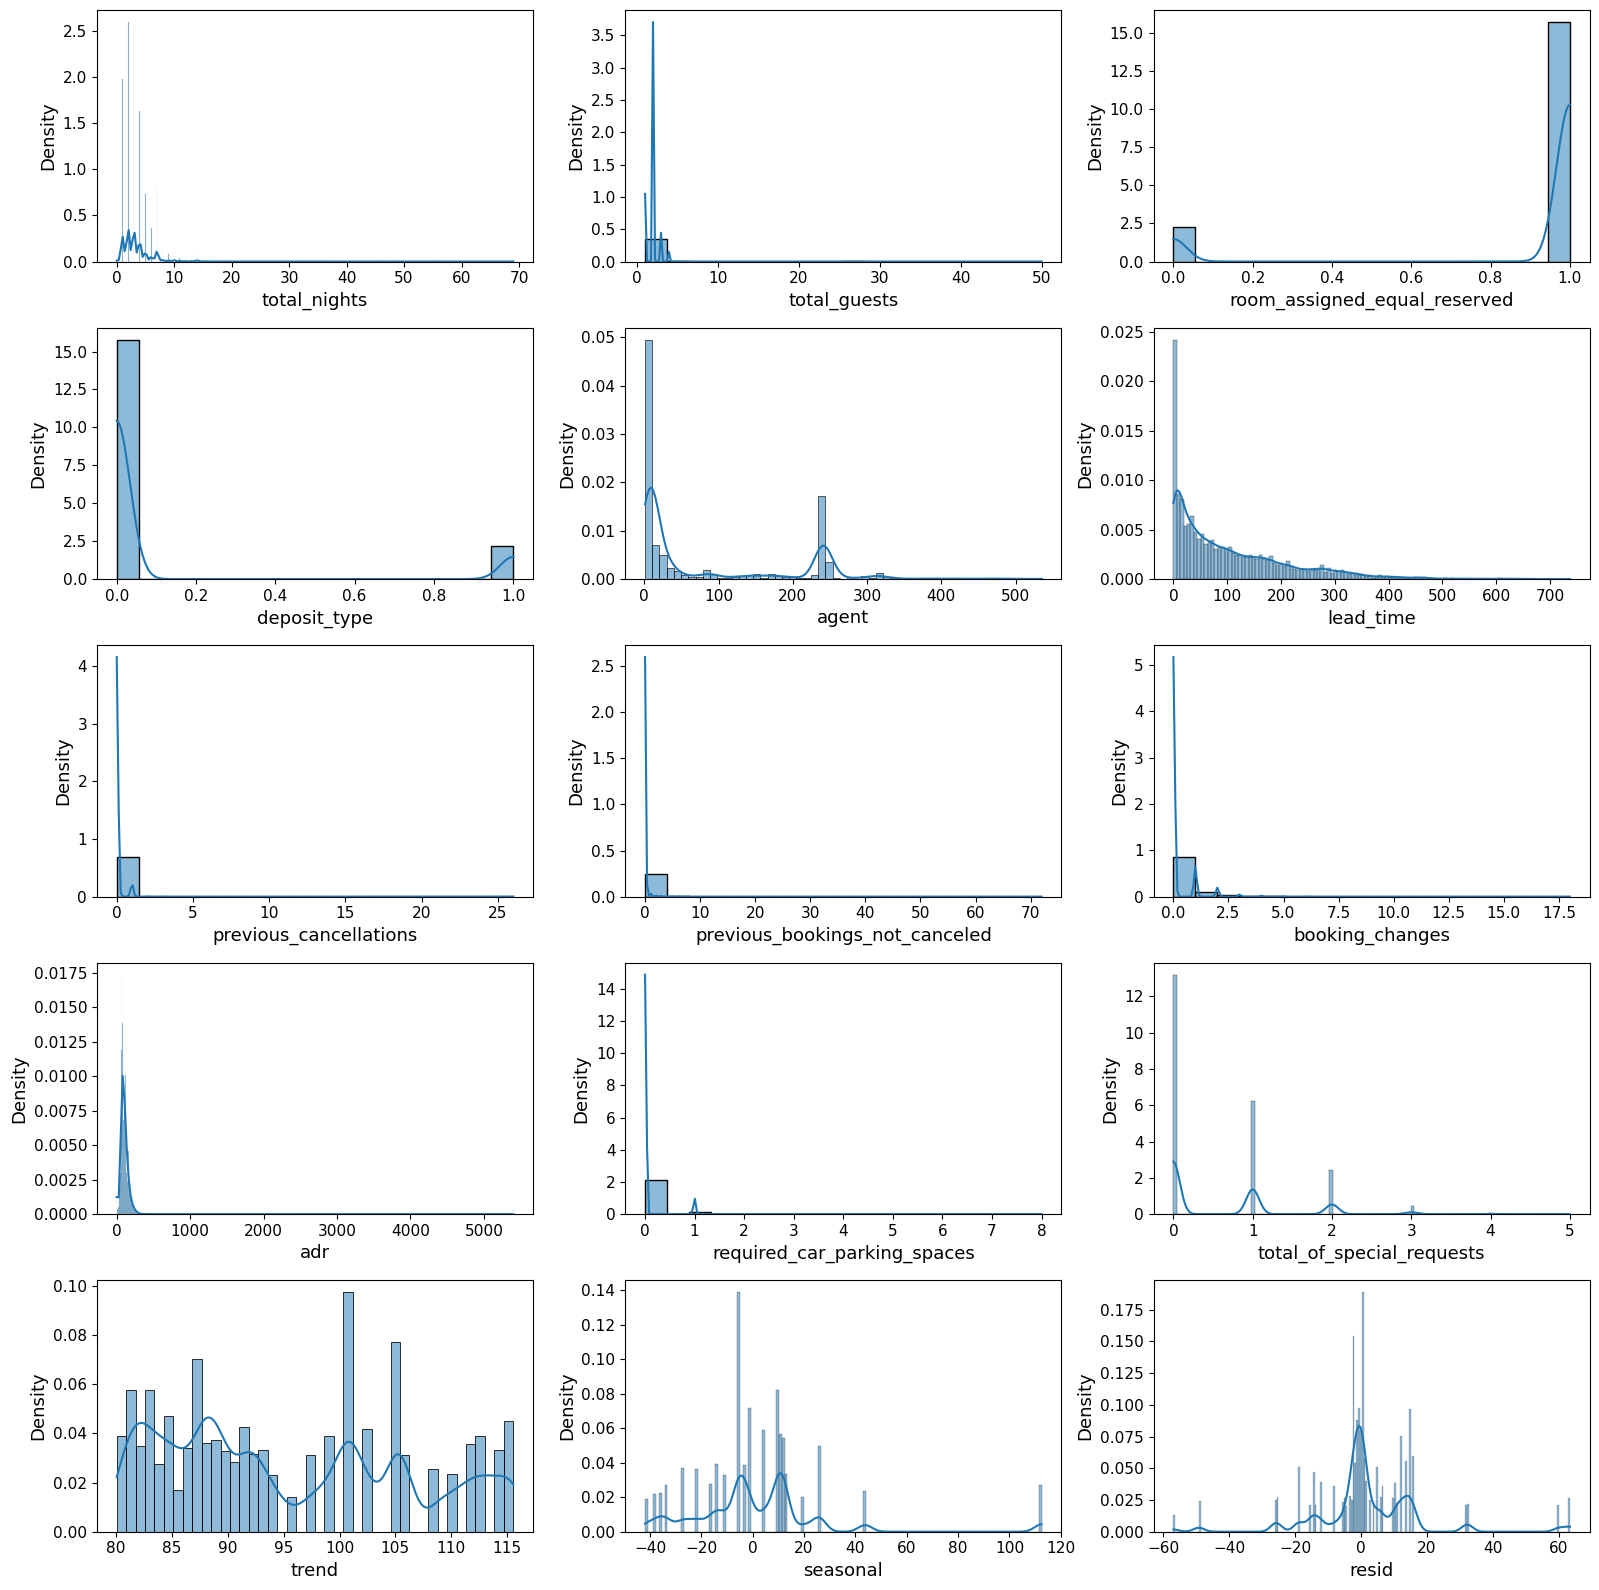

In [26]:
fig, ax = plt.subplots(5,3, figsize = (16,16))

for i, col in enumerate(num_cols):
    sns.histplot(data = X_train_transformed, x = col, ax = ax[i//3, i%3], stat='density', kde=True)

fig.tight_layout()

    We will approach this problem as before, but encapsulating everything into functions.

In [27]:
outlier_columns = ['total_guests', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                  'required_car_parking_spaces', 'total_of_special_requests', 'total_nights']
values = [4, 1, 1, 1, 1, 2, 8]

d = {}

for obj in zip(outlier_columns, values):
    d[obj[0]] = obj[1]

print(d)    

{'total_guests': 4, 'previous_cancellations': 1, 'previous_bookings_not_canceled': 1, 'booking_changes': 1, 'required_car_parking_spaces': 1, 'total_of_special_requests': 2, 'total_nights': 8}


In [28]:
def outlier_func(df):
    dictionary = {'total_guests': 4, 'previous_cancellations': 1, 'previous_bookings_not_canceled': 1, 
                  'booking_changes': 1, 'required_car_parking_spaces': 1, 'total_of_special_requests': 2, 
                  'total_nights': 8}
    for col in df:
        val = dictionary[col]
        df[col] = np.where(df[col]>=val, val, df[col])
    return df

In [29]:
def log_transform(df):
    for col in df:
        df[col] = np.log1p(df[col])
    return df.fillna(0) 

In [30]:
# binning feature agent
binner = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile', random_state=134)

In [31]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', one_hot_encoder, low_cardinality_feats),
        ('target_encoder', target_encoder, high_cardinality_feats),
        ('outliers_replace', FunctionTransformer(outlier_func), outlier_columns),
        ('log_transform', FunctionTransformer(log_transform), ['lead_time', 'adr']),
        ('binning', binner, ['agent'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [32]:
X_train_preprocessed = preprocessor2.fit_transform(X_train_transformed, y_train)

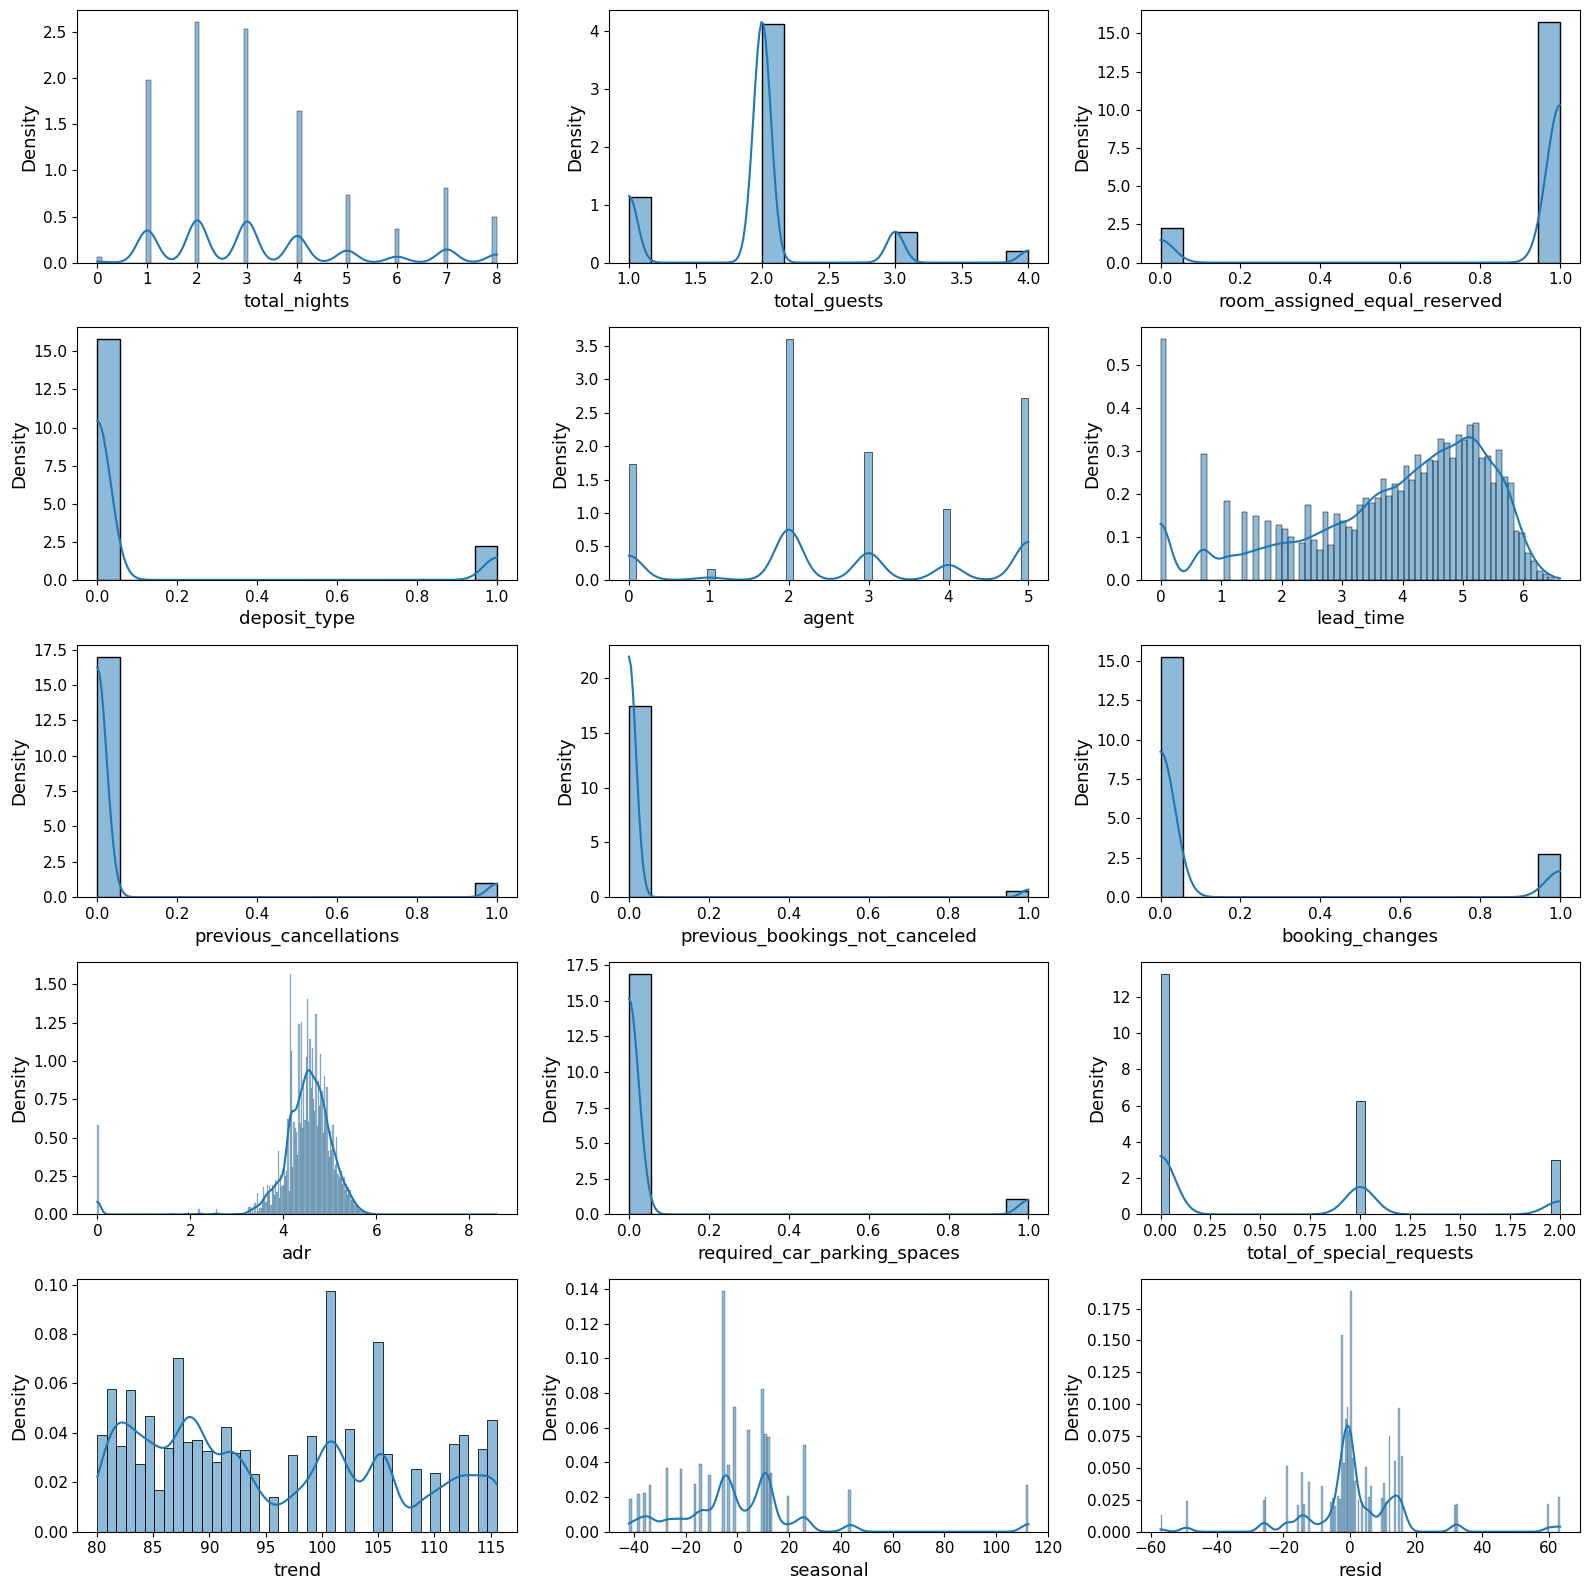

In [33]:
fig, ax = plt.subplots(5,3, figsize = (16,16))

for i, col in enumerate(num_cols):
    sns.histplot(data = X_train_preprocessed, x = col, ax = ax[i//3, i%3], stat='density', kde=True)

fig.tight_layout()

    As LogisticRegression uses gradient descent to optimize feature weights, bringing the data to the similar scale would be neccessary.

In [34]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [35]:
scaler2 = ColumnTransformer(
    transformers=[
        ('std_scaler', std_scaler, ['lead_time', 'adr', 'seasonal', 'resid']),
        ('min_max_scaler', min_max_scaler, ['total_nights', 'total_guests', 
                                            'agent', 'total_of_special_requests', 'trend'])
    ],
    remainder = 'passthrough'
)

In [36]:
log_reg2 = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor2),
        ('scaler', scaler2),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression(max_iter=200))
        # we set max_iter higher than default to prevent ConvergenceWarning showing up
    ])

    So, we created a specific model building procedure which consists of different steps (transforming, preprocessing, scaling...). It is time to estimate its' generalization perfomance and for that purpose we will resort to NestedCrossValidation. This is a computationally expensive technique, however our dataset is not too big so we'll go for it. The key advantage of Nested CV is that it prevents information leakage during the training procedure leading to not overly optimistic results on the validation data.

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [38]:
# filtering warnings which show up because of the processes in GridSearchCV running in parallel
import os

os.environ['PYTHONWARNINGS'] = 'ignore:DataFrameGroupBy.apply operated on the grouping columns:DeprecationWarning,\
                                ignore:Bins whose width are too small:UserWarning,\
                                ignore:invalid value encountered in log1p:RuntimeWarning,\
                                ignore:Found unknown categories in columns:UserWarning'

In [39]:
outer_nest_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)
inner_nest_cv = StratifiedKFold(n_splits=3)

In [40]:
l1 = np.array([0.1, 0.3, 0.5, 0.7, 1])
l2 = np.arange(5, 31, 5)
l3 = np.arange(40, 151, 10)
C_list = np.concatenate([l1,l2,l3])

In [41]:
param_grid = {'model__C': C_list}

In [42]:
from time import time

In [43]:
gscv = GridSearchCV(log_reg2, param_grid=param_grid, cv = inner_nest_cv, n_jobs=-1, scoring='neg_log_loss')

In [44]:
t0 = time()
cv_scores = cross_validate(gscv, X, y, cv = outer_nest_cv, n_jobs=-1, 
                           scoring=['balanced_accuracy', 'precision', 'recall', 'f1']
                          )

In [45]:
print(f"Done in {time() - t0:.1f}s")

Done in 113.6s


In [46]:
log_reg2_nestedCV = pd.DataFrame(cv_scores).drop(['fit_time', 'score_time'], axis=1).agg(['mean', 'std']).T
log_reg2_nestedCV

mean       std
test_balanced_accuracy  0.803516  0.000304
test_precision          0.820438  0.002216
test_recall             0.696906  0.001105
test_f1                 0.753641  0.000431

    What this table tells us is, that by implementing such model we could expect precision and recall to be approximately 0.82 and 0.697, respectively, on the unseen data, regardless of a model generating method (by this I imply the way we split our data on train and test sets). Is it the best model building procedure? - this question still remains open. 

In [43]:
# Creating NestedCV function
def NestedCV_log_reg(model):
    outer_nest_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)
    inner_nest_cv = StratifiedKFold(n_splits=3)
    param_grid = {'model__C': C_list}
    
    gscv = GridSearchCV(model, param_grid=param_grid, cv = inner_nest_cv, n_jobs=-1, scoring='neg_log_loss')
    
    t0 = time()
    cv_scores = cross_validate(gscv, X, y, cv = outer_nest_cv, n_jobs=-1, 
                               scoring=['balanced_accuracy', 'precision', 'recall', 'f1']
                              )
    print(f"Done in {time() - t0:.1f}s")
    return(pd.DataFrame(cv_scores).drop(['fit_time', 'score_time'], axis=1).agg(['mean', 'std']).T)

#### Personal remark concearning the significance of precision and recall for this particular classification problem:

The main aim is to understand in advance whether a booking will be canceled (1) or not (0). I would assume that enhancing precision metric should be more prioritized over finding the best trade-off between precision and recall. When precision increases it implies, that we get less FalsePositive predictions. In other words, we are more likely to predict 0 when 1 is a true value rather than 1 instead 0, which I find good for the hotel bussiness. The reasoning behind: 
- It is a good idea to take measures towards those guests who are in question. These could be keeping them interested to come (offering special deals, discounts e.t.c) or maybe being prepared to offer the booked room to other people (so that it remains occupied on these dates).
- However, in my opinion, these measures are applicable only with strong certainty of cancellation, otherwise these actions could induce inconviniences or income loss.
- With that said, it is not a huge problem to miss some cancellations (have lower recall), but it is more profitable to be very certain about cancellation (less false positives --> higher precision).

In terms of our model, predicting 0 correctly is more important than predicting 1 correctly. Thus, weight of class 0 should be greater in magnitude. The following two cells demonstrate the impact of such class weights tweaking:

In [48]:
log_reg2_weights = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor2),
        ('scaler', scaler2),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression(max_iter=200, class_weight={0: 1, 1: 0.5}))
    ])

In [49]:
log_reg2_weights_nestedCV = NestedCV_log_reg(log_reg2_weights)
log_reg2_weights_nestedCV

Done in 103.5s


mean       std
test_balanced_accuracy  0.754571  0.002464
test_precision          0.913411  0.004078
test_recall             0.539273  0.005694
test_f1                 0.678142  0.004143

As expected, we get essential decreasement of recall and, as a consequence, f1-score metrics. However, for this price we obtain better precision score, exactly what is desired.  

    Another useful step would be plotting Learning curves for our model. This is a good method to check sanity of the model and get ideas what could potentially improve its' perfomance.

In [44]:
cv = StratifiedKFold()
gscv = GridSearchCV(log_reg2, param_grid=param_grid, cv = cv, n_jobs=-1, scoring='neg_log_loss')

In [45]:
t0 = time()
gscv.fit(X_train, y_train)

print(f"Done in {time() - t0:.1f}s")

Done in 35.6s


In [46]:
model = gscv.best_estimator_

In [47]:
from sklearn.model_selection import LearningCurveDisplay

Done in 54.7s


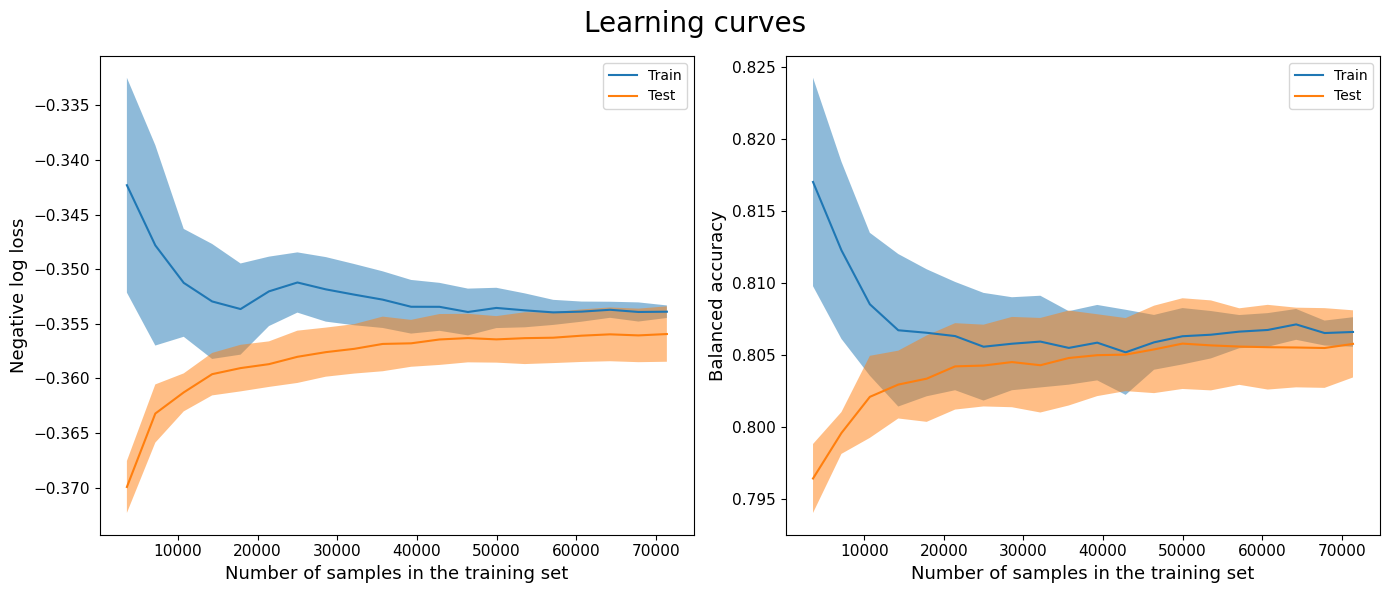

In [48]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
scoring_list = ['neg_log_loss', 'balanced_accuracy']

t0 = time()
for ax_ind, scoring in enumerate(scoring_list): 
    LearningCurveDisplay.from_estimator(model, X_train, y_train, cv = cv,
                                        train_sizes=np.linspace(0.05, 1, 20),
                                        n_jobs=-1, scoring=scoring,
                                        shuffle=True, ax=ax[ax_ind]
                                       )
fig.suptitle("Learning curves", fontsize = 20)
fig.tight_layout()

print(f"Done in {time() - t0:.1f}s")

    From this figure we can conclude that adding more training data would not help improving our model perfomance much. This is due to the fact that with increasment of training samples both lines corresponding to train and test (validation) start being very close and almost parallel to each other. We can confidently assume that in any case the mean test score will not overcome -0.355 negative log loss mark.

    This approch of the lines to each other signalizes that the model is not badly overfitted, still it is hard to say whether we achieved adequate level of its' complexity (balanced accuracy score isn't really impressive). What if our model somewhat biased (underfitted)? We could try increasing perfomance by introducing polynomial features.

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly = PolynomialFeatures(include_bias=False)

In [51]:
cols_to_poly = ['total_nights', 'total_guests', 'room_assigned_equal_reserved',
       'deposit_type', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [52]:
poly_trans = ColumnTransformer(
    transformers=[
        ('poly', poly, cols_to_poly)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [53]:
# getting rid of spaces in new polynomial features
def replace_gaps(df):
    for col in df.columns:
        df.rename({col: col.replace(' ', '*')}, axis = 1, inplace = True)
    return df

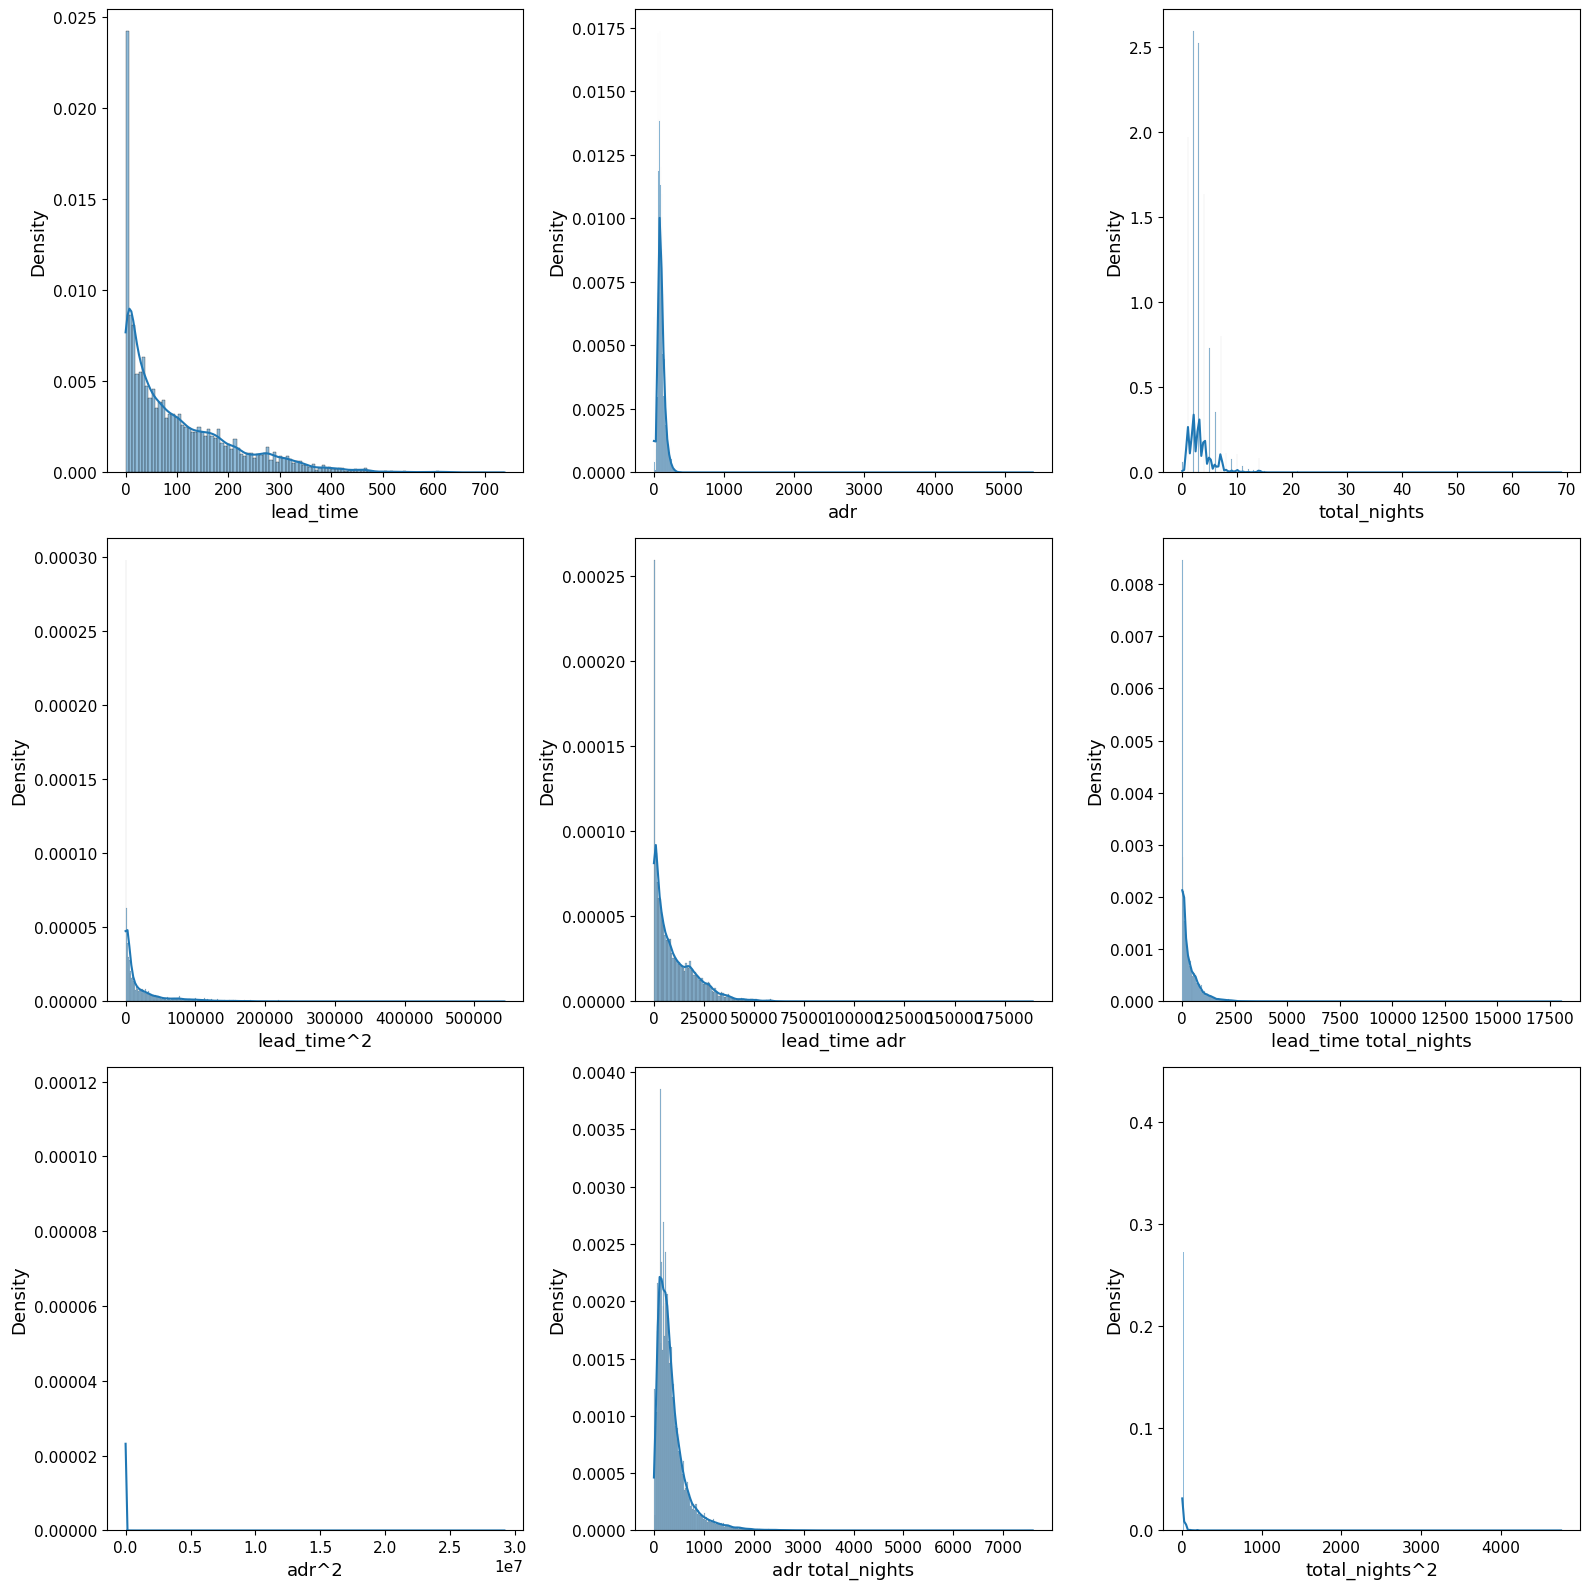

In [54]:
# example
X_poly = poly.fit_transform(X_train_transformed[['lead_time', 'adr', 'total_nights']])

fig, ax = plt.subplots(3,3, figsize = (16,16))

for i, col in enumerate(X_poly.columns):
    sns.histplot(data = X_poly, x = col, ax = ax[i//3, i%3], stat='density', kde=True)

fig.tight_layout()

    We will apply log transform to all features containing lead_time or adr in their names --> we need to form the list of such features.

In [55]:
intermediate_preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', one_hot_encoder, low_cardinality_feats),
        ('target_encoder', target_encoder, high_cardinality_feats)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [56]:
intermediate_model = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('poly_trans', poly_trans),
        ('replace_gaps', FunctionTransformer(replace_gaps)),
        ('preprocessor', intermediate_preprocessor),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression(max_iter=300))
    ])

In [57]:
intermediate_model.fit(X_train,y_train)
print('Fitting done')

Fitting done


In [58]:
# features to be log-scaled
log_list = []
for col in ['lead_time', 'adr']:
    l1 = [obj for obj in tmp_X.columns if col in obj]
    log_list.extend(l1)
log_list = list(set(log_list))

In [59]:
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', one_hot_encoder, low_cardinality_feats),
        ('target_encoder', target_encoder, high_cardinality_feats),
        ('outliers_replace', FunctionTransformer(outlier_func), outlier_columns),
        ('log_transform', FunctionTransformer(log_transform), log_list),
        ('binning', binner, ['agent'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [60]:
not_scale_cols = ['hotel_Resort Hotel', 'stays_format_just_week', 'stays_format_just_weekend', 
                  'stays_format_undefined', 'country', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 
                  'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 
                  'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 
                  'market_segment_Undefined', 'distribution_channel_Direct', 'distribution_channel_GDS', 
                  'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'customer_type_Group', 
                  'customer_type_Transient', 'customer_type_Transient-Party']

In [61]:
cols_scale_minmax = ['total_nights', 'total_guests', 'agent', 'total_of_special_requests', 'trend']

In [62]:
cols_scale_std = tmp_X.columns.difference(not_scale_cols).difference(cols_scale_minmax)

In [63]:
scaler_poly = ColumnTransformer(
    transformers=[
        ('std_scaler', std_scaler, cols_scale_std),
        ('min_max_scaler', min_max_scaler, cols_scale_minmax)
    ],
    remainder = 'passthrough'
)

In [64]:
log_reg_poly = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('poly_trans', poly_trans),
        ('replace_gaps', FunctionTransformer(replace_gaps)),
        ('preprocessor', preprocessor_poly),
        ('scaler', scaler_poly),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression(max_iter=400))
    ])

In [60]:
log_reg_poly_nestedCV = NestedCV_log_reg(log_reg_poly)
log_reg_poly_nestedCV

Done in 256.0s


mean       std
test_balanced_accuracy  0.808792  0.000755
test_precision          0.822878  0.004897
test_recall             0.707311  0.003237
test_f1                 0.760716  0.001041

In [65]:
cv = StratifiedKFold()
gscv = GridSearchCV(log_reg_poly, param_grid=param_grid, cv = cv, n_jobs=-1, scoring='neg_log_loss')

In [66]:
t0 = time()
gscv.fit(X_train, y_train)

print(f"Done in {time() - t0:.1f}s")

Done in 82.2s


In [67]:
model = gscv.best_estimator_

In [68]:
from sklearn.model_selection import LearningCurveDisplay

Done in 95.8s


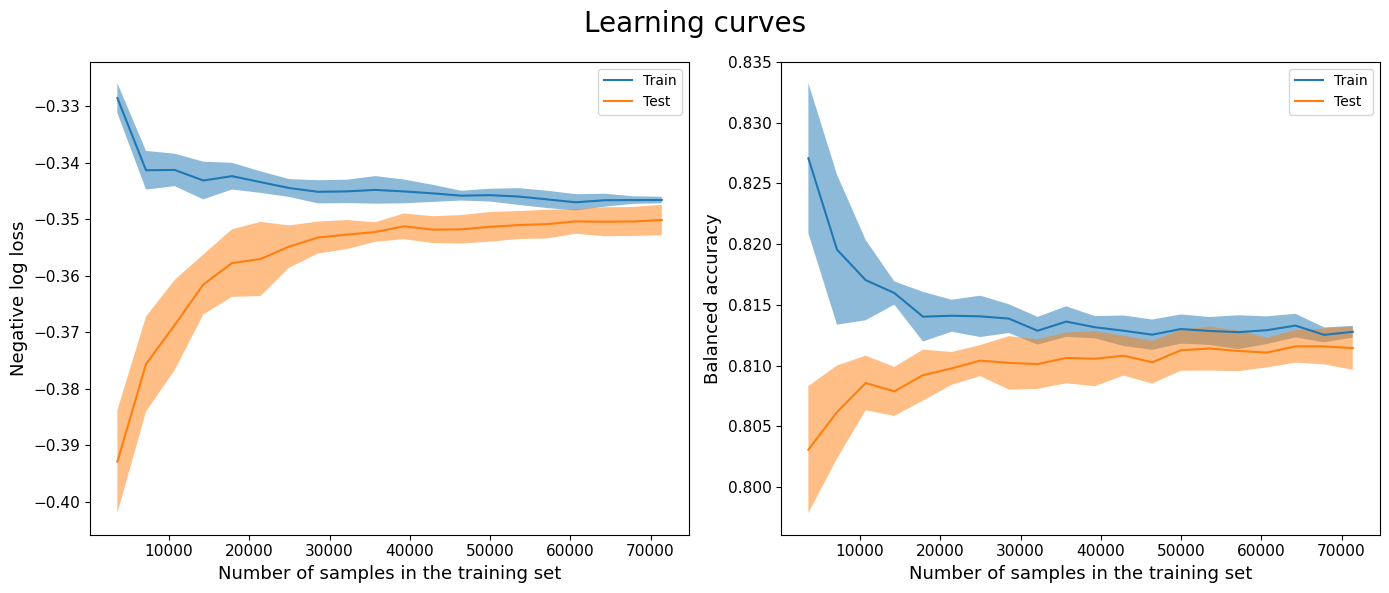

In [69]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
scoring_list = ['neg_log_loss', 'balanced_accuracy']

t0 = time()
for ax_ind, scoring in enumerate(scoring_list): 
    LearningCurveDisplay.from_estimator(model, X_train, y_train, cv = cv,
                                        train_sizes=np.linspace(0.05, 1, 20),
                                        n_jobs=-1, scoring=scoring,
                                        shuffle=True, ax=ax[ax_ind]
                                       )
fig.suptitle("Learning curves", fontsize=20)
fig.tight_layout()

print(f"Done in {time() - t0:.1f}s")

    From the cv_table and both learning curves figures we observe a slight improvement of our metric scores, however the number of features in dataset and fitting time have risen significantly. Thus, we will stick to the model log_reg2.

    Now let us explore if feature selection would be helpful for our model. We will focus on the coefficients learned by it. 

In [70]:
gscv = GridSearchCV(log_reg2, param_grid=param_grid, cv = cv, n_jobs=-1, scoring='neg_log_loss')

In [71]:
gscv.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [72]:
best_log_reg2 = gscv.best_estimator_

In [73]:
best_param = gscv.best_params_['model__C']

In [74]:
res_log_reg = best_log_reg2.named_steps['model']

In [75]:
coef_series = pd.Series(res_log_reg.coef_.squeeze(), index=res_log_reg.feature_names_in_)

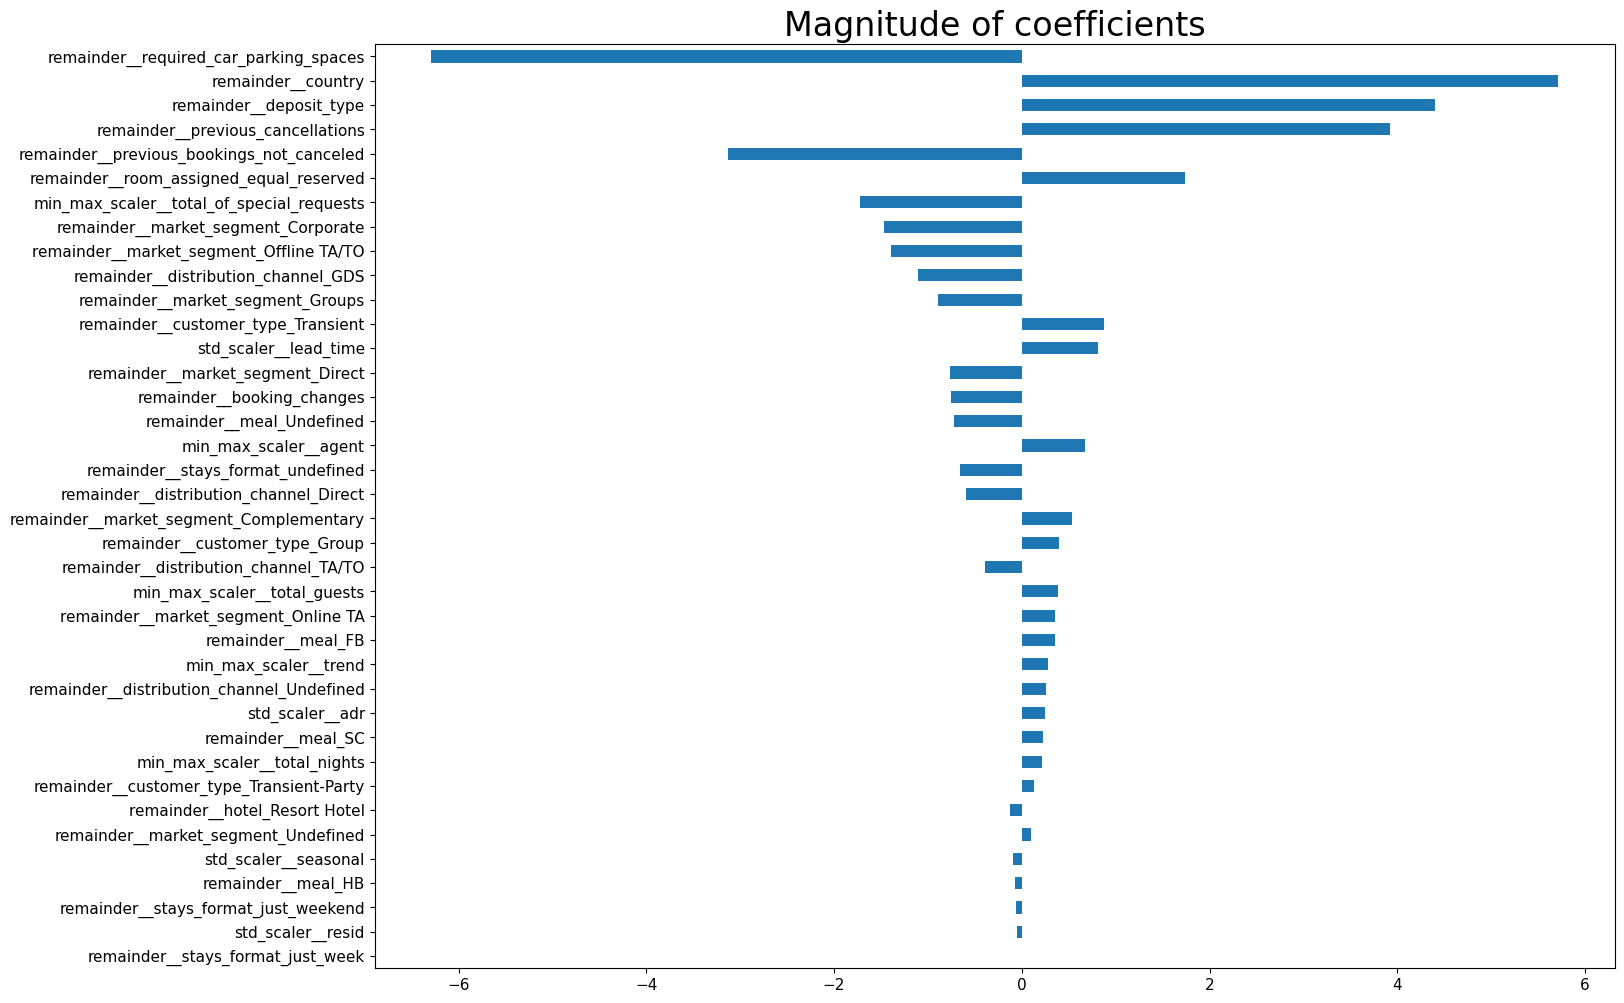

In [77]:
plt.figure(figsize = (16,12))
coef_series.sort_values(key=abs).plot.barh()
plt.title('Magnitude of coefficients', fontsize = 24)
plt.show()

    From this picture we observe that coefficients of some features differ drastically from other in magnitude, i.e. some features have more impact than others. We are going to find out if we have redundant features, which we can exclude to improve the perfomance.

In [74]:
sorted_col_names = list(coef_series.sort_values(key=abs).index)

In [75]:
def drop_cols(df):
    copy_drop_list = drop_list.copy()
    for name in copy_drop_list:
        if name not in df.columns:
            copy_drop_list.remove(name)
    return df.drop(copy_drop_list, axis=1)

In [76]:
pipeline = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor2),
        ('scaler', scaler2),
        ('drop_cols', FunctionTransformer(drop_cols)),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression(max_iter=200, C=best_param))
    ])

In [77]:
train_scores = []
test_scores = []

In [78]:
t0 = time()

for i in range(1, len(sorted_col_names)):
    drop_list = sorted_col_names[:i]
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    train_scores.append(balanced_accuracy_score(y_true=y_train, y_pred=y_pred_train))
    test_scores.append(balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test))
    
print(f"Done in {time() - t0:.1f}s")

Done in 107.5s


In [79]:
scores_df = pd.DataFrame({'train_scores':  train_scores, 'test_scores': test_scores}, 
                          index = np.arange(1, len(train_scores)+1))

scores_df.index.name = 'No_excluded'

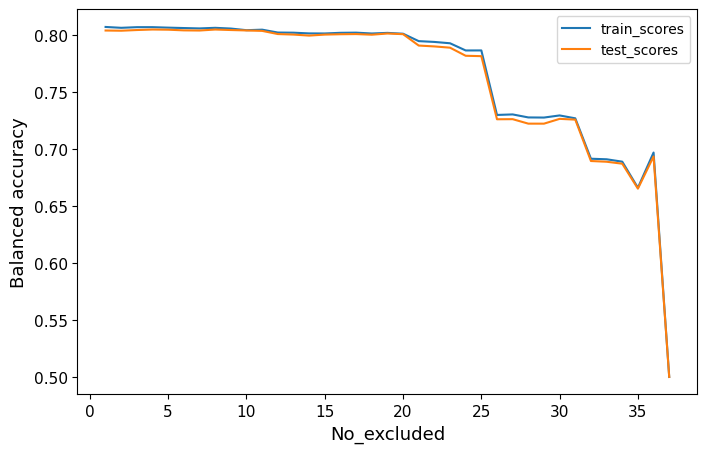

In [80]:
fig, ax = plt.subplots(1,1, figsize = (8,5))
scores_df.plot(ax = ax)
plt.ylabel('Balanced accuracy')
plt.show()

In [81]:
import plotly.express as px

In [82]:
scores_df.reset_index(inplace = True)
px.line(data_frame=scores_df, x = 'No_excluded', y=['train_scores', 'test_scores'], 
        labels={'value': 'Balanced accuracy'})

    The line chart above reflects dependency between the number of excluded features and the balanced accuracy score across train and test set (here we exclude n features with the least magnitudes of assigned coefficients). Thanks to interactivity of the plot we conclude the following: despite we don't get any increasement in scores we don't get almost any loss in balanced accuracy till the number of excluded features reaches 20. Let us perform nested cross validation leaving out 19 least significant features. 

In [83]:
drop_list = sorted_col_names[:19]

In [84]:
log_reg3 = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor2),
        ('scaler', scaler2),
        ('drop_cols', FunctionTransformer(drop_cols)),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', LogisticRegression(max_iter=200))
    ])

In [85]:
log_reg3_nestedCV = NestedCV_log_reg(log_reg3)
log_reg3_nestedCV

Done in 95.4s


mean       std
test_balanced_accuracy  0.800523  0.000471
test_precision          0.815852  0.003971
test_recall             0.693256  0.002094
test_f1                 0.749566  0.000663

In [48]:
log_reg2_nestedCV

mean       std
test_balanced_accuracy  0.803516  0.000304
test_precision          0.820438  0.002216
test_recall             0.696906  0.001105
test_f1                 0.753641  0.000431

    We can notice a slight decreasement of all metric scores for log_reg3 compared to log_reg2. However we reduced the number of features by half, what improves interpretability and computational efficiency of our model. I would consider this as a positive achievement. 

    Finally let us perform tuning of decision threshold. The default threshold (probability estimate of 0.5) might not be optimal for maximizing a certain metric. As before, we continue to treat both classes as equally important, making attempts to increase such metrics as balanced accuracy and f1-score.

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

#### Finding out and setting the best C for log_reg3 and fitting the model

In [88]:
gscv = GridSearchCV(log_reg3, param_grid=param_grid, cv = cv, n_jobs=-1, scoring='neg_log_loss')

In [89]:
gscv.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [90]:
best_C = gscv.best_params_['model__C']

params = {'model__C': best_C}

log_reg3.set_params(**params)
print('Parameter set')

Parameter set


In [91]:
log_reg3.fit(X_train, y_train)
print('Fitting done')

Fitting done


#### Finding out fpr and tpr values corresponding to default threshold 

In [92]:
y_pred_proba_orig = log_reg3.predict_proba(X_test)[:,1]

fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba_orig)
pr, rec, pr_rec_thresholds = precision_recall_curve(y_test, y_pred_proba_orig)

In [93]:
roc_thresh_05_arg = np.abs(roc_thresholds - 0.5).argmin()
pr_rec_thresh_05_arg = np.abs(pr_rec_thresholds - 0.5).argmin()

fpr_05 = fpr[roc_thresh_05_arg]
tpr_05 = tpr[roc_thresh_05_arg]

pr_05 = pr[pr_rec_thresh_05_arg]
rec_05 = rec[pr_rec_thresh_05_arg]

#### Applying TunedThresholdClassifierCV to find the best threshold maximizing balanced accuracy

In [94]:
from sklearn.model_selection import TunedThresholdClassifierCV

In [95]:
cv = StratifiedKFold(shuffle=True, random_state=123)

In [96]:
tuned_model = TunedThresholdClassifierCV(log_reg3, cv=cv, n_jobs=-1,
                                         scoring='balanced_accuracy'
                                         #store_cv_results=True
                                        )

In [97]:
tuned_model.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [98]:
roc_thresh_tuned_arg = np.abs(roc_thresholds - tuned_model.best_threshold_).argmin()
pr_rec_thresh_tuned_arg = np.abs(pr_rec_thresholds - tuned_model.best_threshold_).argmin()

fpr_thresh_tuned = fpr[roc_thresh_tuned_arg]
tpr_thresh_tuned = tpr[roc_thresh_tuned_arg]

pr_thresh_tuned = pr[pr_rec_thresh_tuned_arg]
rec_thresh_tuned = rec[pr_rec_thresh_tuned_arg]

#### Building ROC and PrecisionRecall curves for visualization

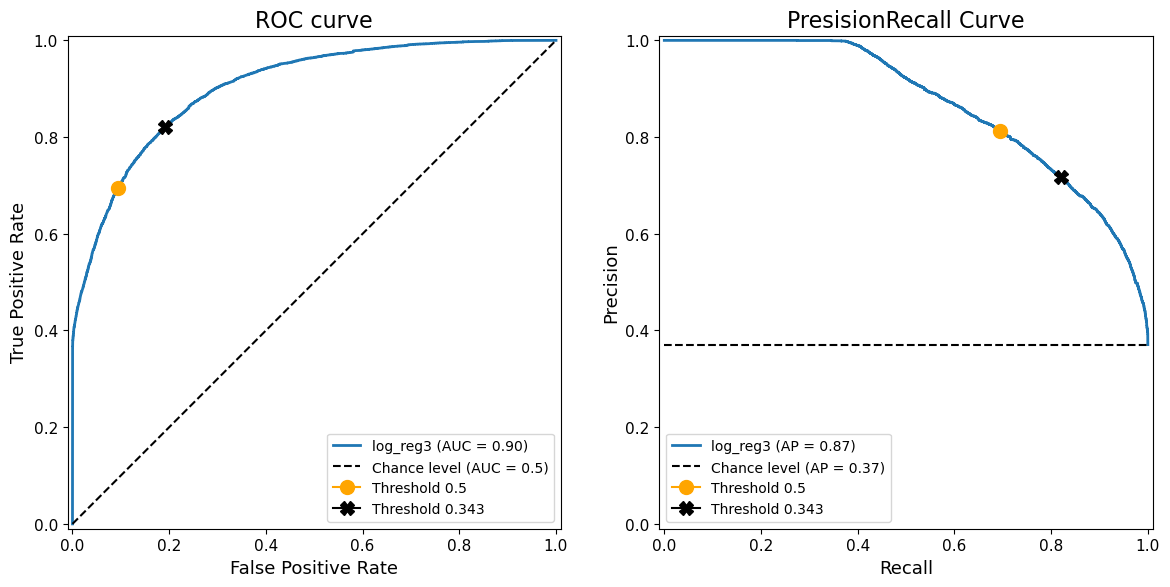

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (14,8))

# plotting ROC Curve
roc = RocCurveDisplay.from_estimator(
    log_reg3,
    X_test,
    y_test,
    name="log_reg3",
    plot_chance_level=True,
    linewidth=2,
    ax=ax1,
)

roc.ax_.plot(
    fpr_05, tpr_05, 
    marker='o', 
    c = 'orange', 
    markersize=10,
    label='Threshold 0.5'
)

roc.ax_.plot(
    fpr_thresh_tuned, tpr_thresh_tuned, 
    marker='X', 
    c = 'black', 
    markersize=10,
    label= f"Threshold{tuned_model.best_threshold_: .3f}"
)

roc.ax_.set_xlabel('False Positive Rate')
roc.ax_.set_ylabel('True Positive Rate')
roc.ax_.set_title('ROC curve')
roc.ax_.legend()

# plotting PrecisonRecall Curve
pr_rec = PrecisionRecallDisplay.from_estimator(
    log_reg3,
    X_test,
    y_test,
    name = "log_reg3",
    plot_chance_level=True,
    linewidth=2,
    ax=ax2
)

pr_rec.ax_.plot(
    rec_05, pr_05, 
    marker='o', 
    c = 'orange', 
    markersize=10,
    label='Threshold 0.5'
)

pr_rec.ax_.plot(
    rec_thresh_tuned, pr_thresh_tuned, 
    marker='X', 
    c = 'black', 
    markersize=10,
    label= f"Threshold{tuned_model.best_threshold_: .3f}"
)

pr_rec.ax_.set_xlabel('Recall')
pr_rec.ax_.set_ylabel('Precision')
pr_rec.ax_.set_title('PresisionRecall Curve')
pr_rec.ax_.legend()

plt.show()

#### Comparing perfomances of original and tuned models

In [100]:
y_pred_orig = log_reg3.predict(X_test)

In [101]:
b_acc_score_orig = balanced_accuracy_score(y_test, y_pred_orig)
print(f"Balanced accuracy score with 0.5 (default) threshold: {b_acc_score_orig: .4f}")

Balanced accuracy score with 0.5 (default) threshold:  0.8009


In [102]:
y_pred_tuned = tuned_model.predict(X_test)

In [103]:
b_acc_score_tuned = balanced_accuracy_score(y_test, y_pred_tuned)
print(f"Balanced accuracy score with {tuned_model.best_threshold_:.3f} (tuned) threshold: {b_acc_score_tuned: .4f}")

Balanced accuracy score with 0.343 (tuned) threshold:  0.8150


    In general balanced accuracy is the mean of TPR (TruePositiveRate) and TNR (TrueNegativeRate). In turn the latter equals to 1 - FPR, where FPR is FalsePositiveRate. With that said, it totally makes sense that the best balanced accuracy score is achieved when we establish the best trade-off between TPR and FPR. On the ROC curve this condition is reflected by the point, which is the closest to the upper-left corner of the plot. Thus, it is natural that TunedThresholdClassifierCV found new threshold which corresponds to such trade-off (depicted by black cross on the ROC curve display). Regarding the PrecisionRecall curve, location of marks also makes sense. The lower the precision, the lower is TNR, but we also obtained higher recall (TPR), which rose more significantly (visually from the plot). In other words, precision-recall trade-off was found.

    In order to get robust estimate of tuned model's performance we again resort to NestedCV.

In [104]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [105]:
inner_cv = StratifiedKFold(n_splits=3)
outer_cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=20, random_state=123)

#### Maximizing balanced accuracy

In [106]:
tuned_log_b_acc = TunedThresholdClassifierCV(log_reg3, cv=inner_cv, n_jobs=-1,
                                             scoring='balanced_accuracy'
                                            )

In [107]:
t0 = time()

cv_scores_b_acc = cross_validate(tuned_log_b_acc, X, y, cv = outer_cv, n_jobs=-1,
                                 scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'],
                                 return_estimator=True
                                )

print(f"Done in {time() - t0:.1f}s")

Done in 107.6s


In [108]:
test_scores = ['test_balanced_accuracy', 'test_precision', 'test_recall', 'test_f1']

In [109]:
tuned_b_acc_scores = pd.DataFrame(cv_scores_b_acc)[test_scores].agg(['mean', 'std']).T
tuned_b_acc_scores

mean       std
test_balanced_accuracy  0.815212  0.001989
test_precision          0.734248  0.007412
test_recall             0.801456  0.008298
test_f1                 0.766310  0.002404

#### Maximizing f1-score

In [110]:
tuned_log_f1 = TunedThresholdClassifierCV(log_reg3, cv=inner_cv, n_jobs=-1,
                                          scoring='f1'
                                         )

In [111]:
t0 = time()

cv_scores_f1 = cross_validate(tuned_log_f1, X, y, cv = outer_cv, n_jobs=-1,
                              scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'],
                              return_estimator=True
                             )

print(f"Done in {time() - t0:.1f}s")

Done in 158.0s


In [112]:
tuned_f1_scores = pd.DataFrame(cv_scores_f1)[test_scores].agg(['mean', 'std']).T
tuned_f1_scores

mean       std
test_balanced_accuracy  0.815294  0.001893
test_precision          0.720156  0.011724
test_recall             0.818325  0.015704
test_f1                 0.765878  0.002167

    We considered two scenarios: maximizing balanced accuracy and then same for f1-score. As a result, we obtained relatively similar results. However, we still opt for balanced accuracy as scoring metric for TunedThresholdClassifierCV as it showed slightly better performance.

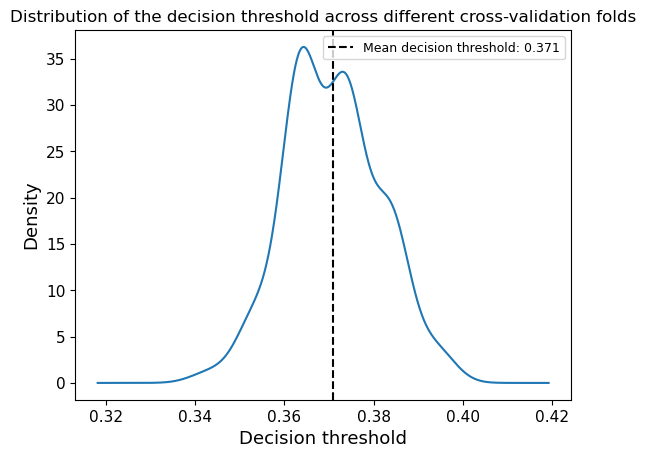

In [113]:
decision_thresh = pd.Series(
    [est.best_threshold_ for est in cv_scores_b_acc['estimator']]
                           )
mean_thresh = decision_thresh.mean()
ax = decision_thresh.plot.kde()

ax.axvline(
    mean_thresh,
    color="k",
    linestyle="--",
    label=f"Mean decision threshold: {mean_thresh:.3f}",
)

ax.set_xlabel("Decision threshold")
ax.legend(loc="upper right", fontsize=9)
ax.set_title("Distribution of the decision threshold across different cross-validation folds", fontsize=12)

plt.show()

    In average, a decision threshold around 0.37 maximizes the balanced accuracy. Let us make our final model: we just fix a new cut-off point for the decision function of log_reg3.

In [114]:
from sklearn.model_selection import FixedThresholdClassifier

In [115]:
final_log_reg = FixedThresholdClassifier(log_reg3, threshold=mean_thresh)

In [116]:
final_log_reg.fit(X_train, y_train)
y_pred_final = final_log_reg.predict(X_test)
b_acc_final = balanced_accuracy_score(y_test, y_pred_final)
print(f"Applying final model we obtain balanced accuracy of {b_acc_final:.4f} on the test set")

Applying final model we obtain balanced accuracy of 0.8140 on the test set


    It only remains to fit the final model on the whole data.

In [117]:
final_log_reg.fit(X, y)
print("Final fitting done!")

Final fitting done!


#### Another personal remark concearning the significance of precision and recall for this particular classification problem:

If we knew exactly (or at least approximately) how much we gain (lose) making TP, FP, FN, TN predictions, respectively, we could create a metric of our own and maximize it by finding the most suitable threshold. 

Still, from my personal perspective, it seems that false positives (predicting that there will be a cancellation when in reality not) are more dangerous than false negatives: empty room and related losses are not as important as reputation of a hotel (imagine if guest still comes and there is no room left for him as certain measures were taken basing on false positive prediction). 

As alternative to cost-sensitive learning, we could determine the maximum FalsePositiveRate, which we consider justified, say 5%:

In [118]:
from sklearn.metrics import make_scorer

In [119]:
def max_tpr_at_fpr_constraint(y_true, y_pred, max_fpr=0.5):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    tpr_at_fpr_constraint = tpr[fpr <= max_fpr].max()
    return tpr_at_fpr_constraint

In [120]:
max_fpr = 0.05

In [121]:
max_tpr_at_fpr_005 = make_scorer(max_tpr_at_fpr_constraint, max_fpr=max_fpr)

In [122]:
cv = StratifiedKFold(shuffle=True, random_state=123)

In [123]:
tuned_model = TunedThresholdClassifierCV(log_reg3, cv=cv, n_jobs=-1,
                                         scoring = max_tpr_at_fpr_005
                                         #store_cv_results=True
                                        )

In [124]:
tuned_model.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [125]:
roc_thresh_tuned_arg = np.abs(roc_thresholds - tuned_model.best_threshold_).argmin()
pr_rec_thresh_tuned_arg = np.abs(pr_rec_thresholds - tuned_model.best_threshold_).argmin()

fpr_thresh_tuned = fpr[roc_thresh_tuned_arg]
tpr_thresh_tuned = tpr[roc_thresh_tuned_arg]

pr_thresh_tuned = pr[pr_rec_thresh_tuned_arg]
rec_thresh_tuned = rec[pr_rec_thresh_tuned_arg]

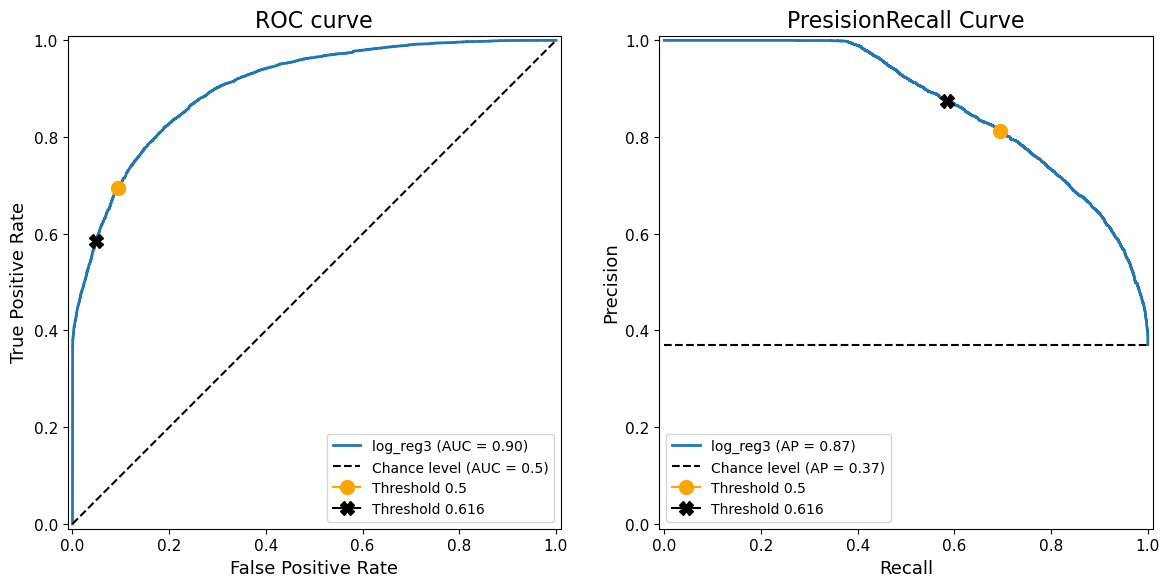

In [126]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (14,8))

# plotting ROC Curve
roc = RocCurveDisplay.from_estimator(
    log_reg3,
    X_test,
    y_test,
    name="log_reg3",
    plot_chance_level=True,
    linewidth=2,
    ax=ax1,
)

roc.ax_.plot(
    fpr_05, tpr_05, 
    marker='o', 
    c = 'orange', 
    markersize=10,
    label='Threshold 0.5'
)

roc.ax_.plot(
    fpr_thresh_tuned, tpr_thresh_tuned, 
    marker='X', 
    c = 'black', 
    markersize=10,
    label= f"Threshold{tuned_model.best_threshold_: .3f}"
)

roc.ax_.set_xlabel('False Positive Rate')
roc.ax_.set_ylabel('True Positive Rate')
roc.ax_.set_title('ROC curve')
roc.ax_.legend()

# plotting PrecisonRecall Curve
pr_rec = PrecisionRecallDisplay.from_estimator(
    log_reg3,
    X_test,
    y_test,
    name = "log_reg3",
    plot_chance_level=True,
    linewidth=2,
    ax=ax2
)

pr_rec.ax_.plot(
    rec_05, pr_05, 
    marker='o', 
    c = 'orange', 
    markersize=10,
    label='Threshold 0.5'
)

pr_rec.ax_.plot(
    rec_thresh_tuned, pr_thresh_tuned, 
    marker='X', 
    c = 'black', 
    markersize=10,
    label= f"Threshold{tuned_model.best_threshold_: .3f}"
)

pr_rec.ax_.set_xlabel('Recall')
pr_rec.ax_.set_ylabel('Precision')
pr_rec.ax_.set_title('PresisionRecall Curve')
pr_rec.ax_.legend()

plt.show()

In [127]:
inner_cv = StratifiedKFold(n_splits=3)
outer_cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=20, random_state=123)

In [128]:
tuned_fpr_constraint = TunedThresholdClassifierCV(log_reg3, cv=inner_cv, n_jobs=-1,
                                                  scoring=max_tpr_at_fpr_005
                                                 )

In [129]:
t0 = time()

cv_scores = cross_validate(tuned_fpr_constraint, X, y, cv = outer_cv, n_jobs=-1,
                           scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'],
                           return_estimator=True
                          )

print(f"Done in {time() - t0:.1f}s")

Done in 145.9s


In [130]:
pd.DataFrame(cv_scores)[test_scores].agg(['mean', 'std']).T

mean       std
test_balanced_accuracy  0.735284  0.001904
test_precision          0.935420  0.003326
test_recall             0.490527  0.004074
test_f1                 0.643557  0.003409

The results are natural: setting FalsePositiveRate low, we obtain higher precision score. Although, it comes at a cost of lower recall score.

<a id = 'rf'><a/>

### RandomForest

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import make_scorer

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import FixedThresholdClassifier
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import TunedThresholdClassifierCV

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

In [13]:
from time import time
import plotly.express as px

In [14]:
import os

os.environ['PYTHONWARNINGS'] = 'ignore:DataFrameGroupBy.apply operated on the grouping columns:DeprecationWarning,\
                                ignore:Bins whose width are too small:UserWarning,\
                                ignore:invalid value encountered in log1p:RuntimeWarning,\
                                ignore:Found unknown categories in columns:UserWarning'

    Tree-based models are known for their ability to capture non-linear relationships in dataset. A big advantage ot these algorithms is that they do not require much data preprocessing like feature engineering, scaling or normalization. 

    In the following section application of RandomForestClassifier is carried out. This is a bagging ensemble method with DecisionTreeClassifier as a base model. A single decision tree is prone to overfitting. Random forest, in turn, involves training multiple decision trees on different subsets of the training data and then averaging their predictions. That makes it robust to overfitting.

In [15]:
high_cardinality_feats = ['country']
low_cardinality_feats = ['customer_type', 'distribution_channel', 'hotel', 
                         'market_segment', 'meal', 'stays_format']

In [16]:
label_encoder = LabelEncoder()
target_encoder = TargetEncoder(target_type='binary', random_state=142)

In [17]:
def Le_Func(df):
    for col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', FunctionTransformer(Le_Func), low_cardinality_feats),
        ('target_encoder', target_encoder, high_cardinality_feats)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [19]:
rf_pipe = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor),
        # in this step we can obtain the result of transform by ETL_pipeline and preprocessor 
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', RandomForestClassifier(n_jobs=-1))
    ])

In [20]:
rf_pipe.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [21]:
init_train_score = balanced_accuracy_score(rf_pipe.predict(X_train), y_train)
print(f"Balanced accuracy on the training set: {init_train_score:.4f}")

Balanced accuracy on the training set: 0.9853


In [22]:
init_test_score = balanced_accuracy_score(rf_pipe.predict(X_test), y_test)
print(f"Balanced accuracy on the test set: {init_test_score:.4f}")

Balanced accuracy on the test set: 0.8841


    Very high train score and relatively low test score - sign of overfitting. We fix random_state to ensure consistency of results.

In [23]:
rf_pipe.set_params(**{'model__random_state': 123})
print('Setting done')

Setting done


    Right now each decision tree uses the whole training dataset to learn on. Moreover, the trees are not limited in growth. These aspects lead to overfitting of each single tree and, consequently, our ensemble. Supposably, if we weaken our learners, we will decrease variance of the model, in other words the model will generalize better. 


    The influence of a single hyperparameter on the training score and validation score can be demonstrated by validation curves. What if we decrease a size of random training sample for each tree?

In [24]:
from sklearn.model_selection import ValidationCurveDisplay

In [25]:
samp_sizes = np.linspace(0.05, 1, 20)
cv = StratifiedKFold()

Done in 122.1s


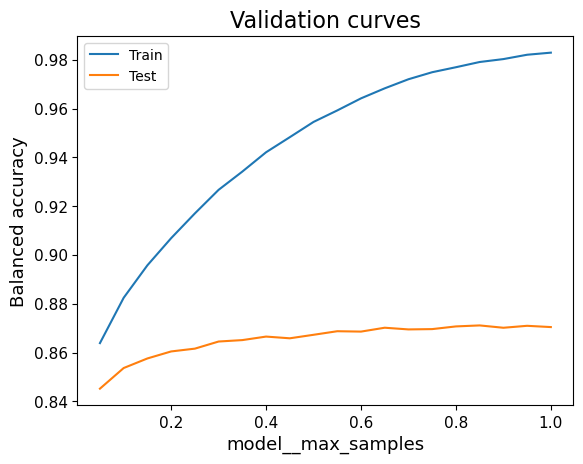

In [27]:
t0 = time()
samp_sizes_disp = ValidationCurveDisplay.from_estimator(
    rf_pipe,
    X_train, 
    y_train,
    param_name='model__max_samples',
    param_range = samp_sizes,
    cv=cv,
    scoring='balanced_accuracy',
    n_jobs=-1,
    std_display_style=None
)
plt.title('Validation curves')
print(f"Done in {time() - t0:.1f}s")

    If we set max_samples to 0.6 we won't change the validation score much, however the training score will decrease.

In [26]:
rf_pipe.set_params(**{'model__max_samples': 0.6})
print("Setting done!")

Setting done!


    As for parameters responsible for the size of the trees, we will consider max_depth and ccp_alpha.

In [27]:
depths = np.arange(1, 31, 1)
ccp_alphas = np.linspace(0, 0.1, 30)

Done in 538.8s


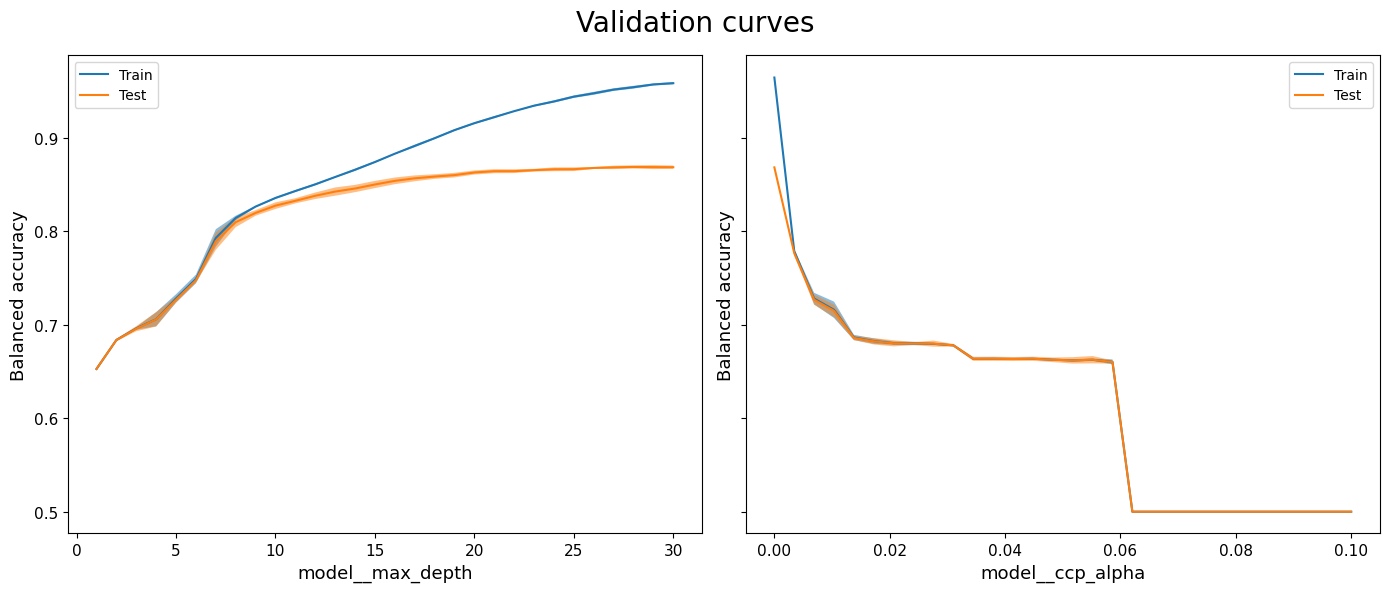

In [28]:
t0 = time()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6), sharey=True)
depth_disp = ValidationCurveDisplay.from_estimator(
    rf_pipe,
    X_train, 
    y_train,
    param_name='model__max_depth',
    param_range = depths,
    cv=cv,
    scoring='balanced_accuracy',
    n_jobs=-1,
    ax=ax1
)

ccp_disp = ValidationCurveDisplay.from_estimator(
    rf_pipe,
    X_train, 
    y_train,
    param_name='model__ccp_alpha',
    param_range = ccp_alphas,
    cv=cv,
    scoring='balanced_accuracy',
    n_jobs=-1,
    ax=ax2
)
fig.suptitle("Validation curves", fontsize = 20)
fig.tight_layout()

print(f"Done in {time() - t0:.1f}s")

    We get drastic decline of both validation and train score when we start pruning. On the other hand, restricting depth of the trees to 20 does not hurt much towards validation score, while it makes train score decrease significantly.

In [28]:
rf_pipe.set_params(**{'model__max_depth': 20})
print('Setting done!')

Setting done!


#### Plotting learning curves

Done in 58.0s


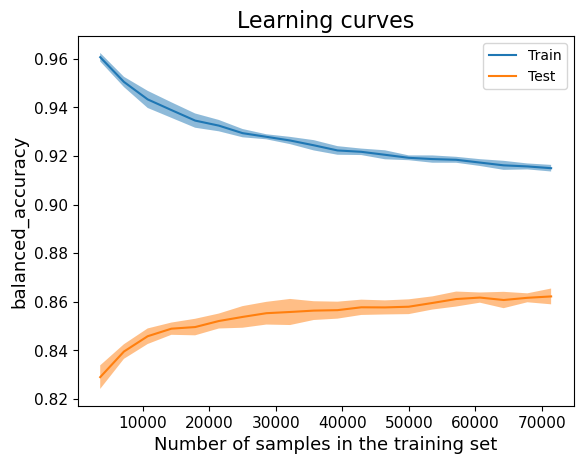

In [31]:
t0 = time()
LearningCurveDisplay.from_estimator(rf_pipe, X_train, y_train, cv = cv,
                                    train_sizes=np.linspace(0.05, 1, 20),
                                    n_jobs=-1, scoring='balanced_accuracy',
                                    shuffle=True, 
                                    score_name = 'balanced_accuracy'
                                   )
plt.title("Learning curves")
print(f"Done in {time() - t0:.1f}s")

    After attempting to influence our model by max_samples and max_depth we still have much higher training score compared to validation score. To resolve this problem collecting more training data could be helpful, as we observe that the lines are slowly converging to each other. 

    Another possible solution is reducing the set of features.

#### Feature importances (Mean Decrease in Impurity)

In [29]:
rf_pipe.fit(X_train, y_train)
print('Fitting done')

Fitting done


In [30]:
importances = rf_pipe.named_steps['model'].feature_importances_
feature_names = rf_pipe.named_steps['model'].feature_names_in_

In [31]:
mdi_series = pd.Series(importances, index = feature_names).sort_values()

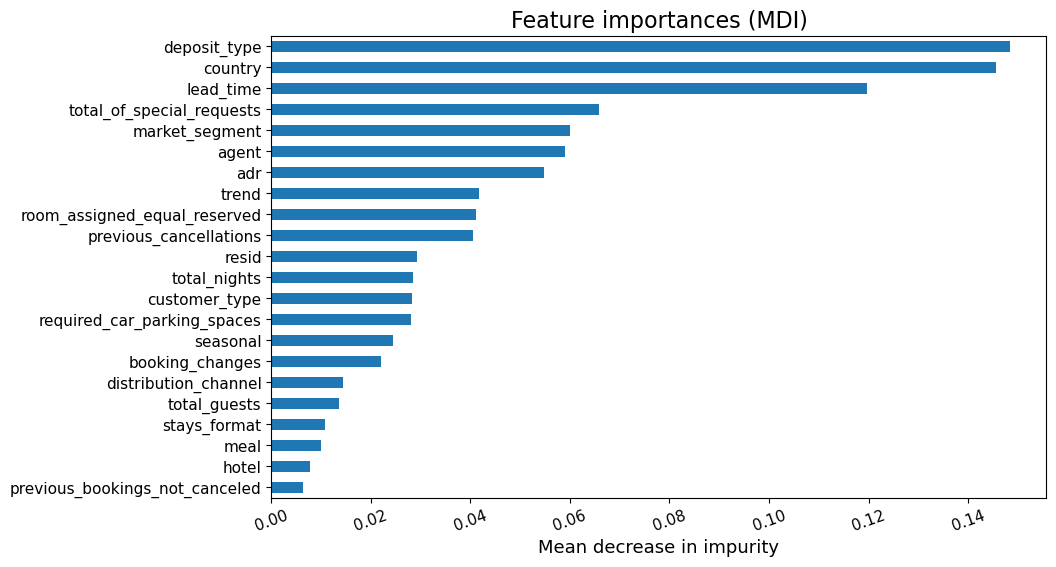

In [32]:
plt.figure(figsize=(10,6))
mdi_series.plot.barh()
plt.title("Feature importances (MDI)")
plt.xlabel("Mean decrease in impurity")
plt.xticks(rotation = 20)
plt.show()

    MDI statistic has a certain drawback - it is derived from the train set only. Therefore, there is no way to ensure that particular feature would be usefull to make predictions that generalize to the unseen data. On the contrary, feature importances based on feature permutation (permutation importances) can be computed on the left-out test set and thus give us better understanding of how impactful the feature is.

#### Permutation importances

In [33]:
from sklearn.inspection import permutation_importance

In [34]:
X_transformed = Transform_Pipe.fit_transform(X, y)

In [35]:
X_tr_train, X_tr_test, y_tr_train, y_tr_test = train_test_split(
    X_transformed, y, test_size=0.25, random_state=123, stratify=y
)

In [36]:
params = {'model__random_state': 123,
          'model__n_jobs': -1,
          'model__max_depth': 20,
          'model__max_samples': 0.6
         }

In [37]:
temp_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        # in this step we can obtain the result of transform by ETL_pipeline and preprocessor 
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', RandomForestClassifier())
    ])

In [38]:
temp_pipe.set_params(**params)
print("Setting done!")

Setting done!


In [39]:
temp_pipe.fit(X_tr_train, y_tr_train)
print("Fitting done!")

Fitting done!


In [40]:
t0 = time()
permut = permutation_importance(
    temp_pipe, X_tr_test, y_tr_test, n_repeats=10, 
    n_jobs=-1, random_state=123,
    scoring = 'balanced_accuracy'
)
print(f"Done in {time() - t0:.1f}s")

Done in 14.4s


In [41]:
perm_importances = permut.importances_mean

permute_series = pd.Series(perm_importances, index = feature_names).sort_values()

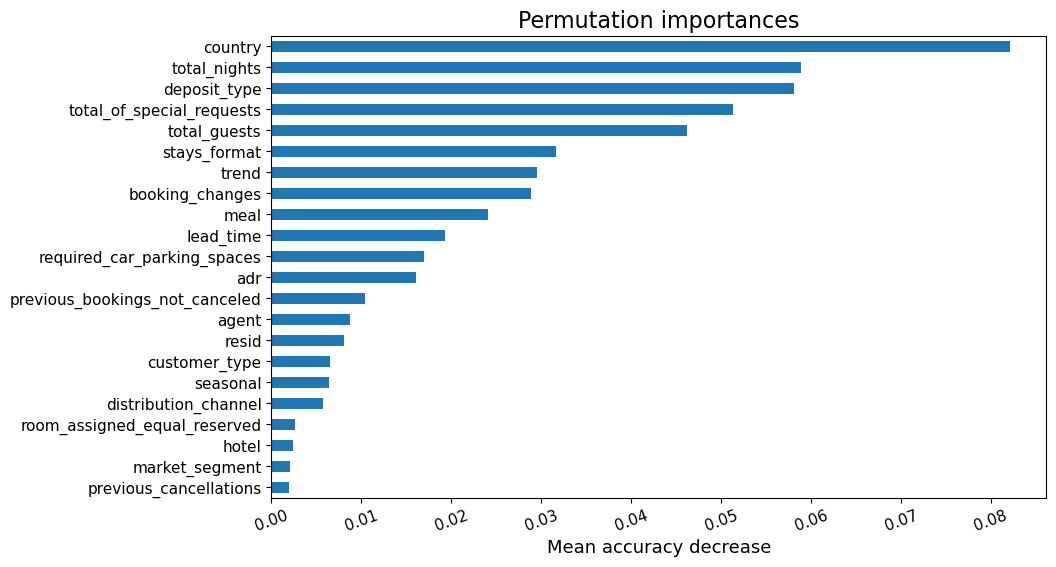

In [42]:
plt.figure(figsize=(10,6))
permute_series.plot.barh()
plt.title("Permutation importances")
plt.xlabel("Mean accuracy decrease")
plt.xticks(rotation = 20)
plt.show()

    According to permutation importances market_segment is not rated well, whereas it got high feature importance on the train set. On the contrary, permutation importance of stays_format showed itself radically better than feature importance. However, it is worth observing that such features as deposit_type, country, total_of_special_requests find themselves in the top on both charts. They may be deemed truly significant.

In [43]:
best_permute_feats = list(permute_series[-13:].index)

#### RFE

In [44]:
from sklearn.feature_selection import RFE

    Recursive Feature Elimination is the method which aims to recursively eliminate the least contributing features until a smaller subset of features is reached.

In [45]:
X_preprocessed = preprocessor.fit_transform(X_transformed, y)

In [46]:
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(
    X_preprocessed, y, test_size=0.25, random_state=123, stratify=y
)

In [47]:
rf = RandomForestClassifier(random_state=123, max_depth=20, max_samples=0.6, n_jobs=-1)

In [48]:
rfe = RFE(rf, n_features_to_select=13)

In [49]:
t0 = time()
rfe.fit(X_prep_train, y_prep_train)

print(f"Done in {time() - t0:.1f}s")

Done in 8.3s


In [50]:
rfe_selected_features = list(rfe.feature_names_in_[rfe.support_])

#### Quick comparison between features with highest permutation importances and features selected by RFE

In [51]:
rf.fit(X_prep_train[best_permute_feats], y_prep_train)
print("Fitting done!")
b_acc = balanced_accuracy_score(rf.predict(X_prep_test[best_permute_feats]), y_prep_test)
print(f"Chosen based on permutation importances: {b_acc:.4f}")

Fitting done!
Chosen based on permutation importances: 0.8539


In [52]:
rf.fit(X_prep_train[rfe_selected_features], y_prep_train)
print("Fitting done!")
b_acc = balanced_accuracy_score(rf.predict(X_prep_test[rfe_selected_features]), y_prep_test)
print(f"Chosen based on RFE procedure: {b_acc:.4f}")

Fitting done!
Chosen based on RFE procedure: 0.8723


#### Modifying pipeline

In [53]:
def select_feats(df):
    return df[rfe_selected_features]

In [54]:
params = {'model__random_state': 123,
          'model__n_jobs': -1,
          'model__max_depth': 20,
          'model__max_samples': 0.6
         }

In [55]:
rf_pipe = Pipeline(
    steps=[
        ('Transform_pipeline', Transform_Pipe),
        ('preprocessor', preprocessor),
        ('selector', FunctionTransformer(select_feats)),
        ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
        ('model', RandomForestClassifier())
    ])

In [56]:
rf_pipe.set_params(**params)
print("Setting done!")

Setting done!


Done in 56.7s


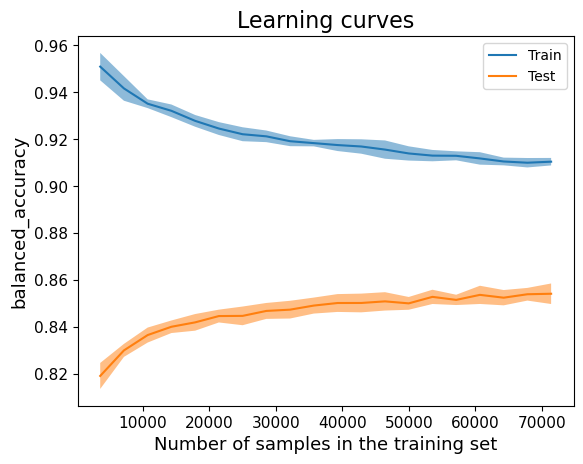

In [61]:
t0 = time()
LearningCurveDisplay.from_estimator(rf_pipe, X_train, y_train, cv = cv,
                                    train_sizes=np.linspace(0.05, 1, 20),
                                    n_jobs=-1, scoring='balanced_accuracy',
                                    shuffle=True, 
                                    score_name = 'balanced_accuracy'
                                   )
plt.title('Learning curves')
print(f"Done in {time() - t0:.1f}s")

    As a result we made the gap between train and validation score smaller, i.e. reduced variance of the model. Although, this came at a cost - the validation score decreased a little. 

#### NestedCV

In [57]:
outer_nest_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)
inner_nest_cv = StratifiedKFold(n_splits=3)

In [58]:
min_samp_split = [2, 3, 5, 8, 10]
max_features = ['sqrt', 'log2', None]

In [59]:
param_grid = {'model__min_samples_split': min_samp_split,
              'model__max_features': max_features
             }

In [61]:
t0 = time()

gscv = GridSearchCV(rf_pipe, param_grid=param_grid, cv = inner_nest_cv, n_jobs=-1, scoring='balanced_accuracy')

cv_scores = cross_validate(gscv, X, y, cv = outer_nest_cv, n_jobs=-1, 
                           scoring=['balanced_accuracy', 'precision', 'recall', 'f1'],
                           return_estimator=True
                          )

print(f'Fitting done in {time() - t0:.2f}s')

Fitting done in 191.84s


In [69]:
pd.DataFrame(cv_scores).drop(['fit_time', 'score_time', 'estimator'], axis=1).agg(['mean', 'std']).T

mean       std
test_balanced_accuracy  0.856370  0.003819
test_precision          0.861011  0.003177
test_recall             0.787669  0.008858
test_f1                 0.822683  0.004613

    We observe the test_balanced_accuracy score to be around 0.856, which is the value that we could expect on the unseen data regardless of the model generating method.

In [70]:
gscv = GridSearchCV(rf_pipe, param_grid=param_grid, cv = inner_nest_cv, n_jobs=-1, scoring='balanced_accuracy')

In [71]:
gscv.fit(X_train, y_train)
print("Fitting done!")

Fitting done!


In [72]:
rf_pipe.set_params(**gscv.best_params_)
print("Setting done!")

Setting done!


In [76]:
rf_pipe.fit(X_train, y_train)
print("Fitting done!")

Fitting done!


#### Final result

In [78]:
b_acc = balanced_accuracy_score(rf_pipe.predict(X_test), y_test)

In [80]:
print(f"We achieved balanced accuracy of {b_acc:.4f} on the test set!")

We achieved balanced accuracy of 0.8623 on the test set!
